## Dataset Features Detail
- Personal
1. ***ID:*** Customer ID
2. ***Year_Birth:*** Year of birth of the customer
3. ***Education:*** Education level of the customer
4. ***Marital_Status:*** Marital status of the customer
5. ***Income:*** Customer's income
6. ***Kidhome:*** Number of children in the household younger than 18
7. ***Teenhome:*** Number of teenagers in the household (aged 18-24)
8. ***Dt_Customer:*** Date when the customer joined
9. ***Recency:*** Number of days since the last purchase
- Products
10. ***MntWines:*** Amount spent on wines
11. ***MntFruits:*** Amount spent on fruits
12. ***MntMeatProducts:*** Amount spent on meat products
13. ***MntFishProducts:*** Amount spent on fish products
14. ***MntSweetProducts:*** Amount spent on sweet products
15. ***MntGoldProds:*** Amount spent on gold products
- Places
16. ***NumDealsPurchases:*** Number of deal purchases made
17. ***NumWebPurchases:*** Number of purchases made through the web
18. ***NumCatalogPurchases:*** Number of purchases made through catalogs
19. ***NumStorePurchases:*** Number of purchases made in stores
20. ***NumWebVisitsMonth:*** Number of web visits per month
- Promotions & Other
21. ***AcceptedCmp1 to AcceptedCmp5:*** Whether the customer accepted the respective marketing campaigns (binary)
22. ***Complain:*** Whether the customer made a complaint (binary)
23. ***Z_CostContact:*** Fixed cost of contacting the customer
24. ***Z_Revenue:*** Revenue from the campaign
25. ***Response:*** Customer response to the campaign (binary)

# 1. Exploratory Data Analysis

## 1.1  Importing Libraries & Loading Data

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
# ML Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Setting to view entire dataset
pd.set_option('display.max_columns', None)
%matplotlib inline

### Loading Data
- Data url : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [2]:
# Loading data
df = pd.read_csv('marketing_campaign.csv',sep="\t")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

## 1.2 Gathering Informations (Basic Data Inspection)

In [3]:
# Getting shape and size
print(f"This data has {df.shape[0]} rows/enties and {df.shape[1]} columns/features.")

This data has 2240 rows/enties and 29 columns/features.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [6]:
# Getting and Storing all the Categorical variables
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
print(f"Numbers of Categorical Features : {len(categorical_features)}")

# Getting and Storing all the Numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
print(f"Numbers of Numerical Features : {len(numerical_features)}")

Numbers of Categorical Features : 3
Numbers of Numerical Features : 26


In [7]:
# Getting Null values
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]

for feature in feature_with_nan:
    print(f"{feature} has {df[feature].isnull().sum()} Null values i.e. around {np.round(df[feature].isnull().mean()*100,3)}% of total data.")

Income has 24 Null values i.e. around 1.071% of total data.


In [8]:
# Getting Duplicate values
print(f'Number of Duplicate Entries : {df.duplicated().sum()}')

Number of Duplicate Entries : 0


In [9]:
# Getting No. of Categories in Categorical Features
for feature in categorical_features:
    print(f"{feature} : {len(df[feature].unique())} categories")

Education : 5 categories
Marital_Status : 8 categories
Dt_Customer : 663 categories


***Observations :***
1. This data has 2240 rows/enties and 29 columns/features.
2. There are 3 Categorical features and 26 Numerical features.
3. Only *Income* feature has 24 null values.
4. There is no Duplicate Values.
5. Categorical features Education has 5 categories & Marital_Status has 8 ctegories.

## 1.3 Data Cleaning

### Handling Missing Values

In [10]:
# Getting the Mean and Median of the feature that have Null values.

print(f"Income mean   : {df.Income.mean()}")
print(f"Income median : {df.Income.median()}")

Income mean   : 52247.25135379061
Income median : 51381.5


- Creating copy of dataset for feature experimental observations.

Income Original Data Standard Deviation        : 25173.07666090141
Income Mean Data Standard Deviation            : 25037.797168392324
Income Median Data Standard Deviation          : 25037.955890621957
Income Random Sampling Data Standard Deviation : 25116.682915309426


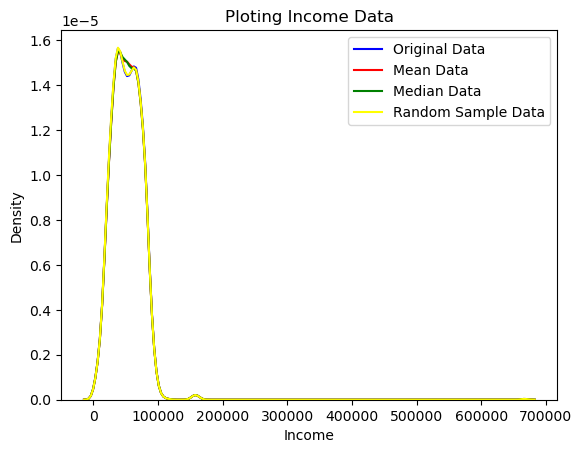

In [11]:
# Creating copy of dataset for feature experimental observations.
data = df.copy()

# Getting Mean, Median & Random Sampling of Income Feature.
data['Income_mean'] = data.Income.fillna(df.Income.mean())
data['Income_median'] = data.Income.fillna(df.Income.median())
# Random sampling
sample_data =data.Income.dropna().sample(data.Income.isnull().sum(),random_state=0)
sample_data.index = data[data.Income.isnull()].index
data['Income_random'] = np.where(data.Income.isnull(),data.Income.fillna(sample_data),data.Income)


# Getting Change in Standard Deviation after replacing Null Values.
print(f"Income Original Data Standard Deviation        : {data.Income.std()}")
print(f"Income Mean Data Standard Deviation            : {data.Income_mean.std()}")
print(f"Income Median Data Standard Deviation          : {data.Income_median.std()}")
print(f"Income Random Sampling Data Standard Deviation : {data.Income_random.std()}")

# Visualizing the change in Standard Deviations.
plt.title("Ploting Income Data")
sns.kdeplot(data['Income'],color='blue',label= 'Original Data')
sns.kdeplot(data['Income_mean'],color='red',label= 'Mean Data')
sns.kdeplot(data['Income_median'],color='green',label= 'Median Data')
sns.kdeplot(data['Income_random'],color='yellow',label= 'Random Sample Data')
plt.legend()
plt.show()

***Observations :*** From the above Plot Visualization we conclude that we can use *Random Sample Imputation* for the replacement of Null Values as the *Standard Deviation* is changing very less here.

- Imputing Random sampling

In [12]:
# Random Sample Imputation in Original DataFrame.

sample_data =df.Income.dropna().sample(df.Income.isnull().sum(),random_state=0)
sample_data.index = df[df.Income.isnull()].index
df['Income'] = np.where(df.Income.isnull(),df.Income.fillna(sample_data),df.Income)

### Feature Engineering

***Feature Creation :***
1. ***Customer_Seniority :*** To know that how oldest is the customer.
2. ***Age :*** To get the age of customer.
3. ***TotalSpent :*** It is a sum of total spent on Wines, Fruits, Meat, Fish, Sweets and Gold.
4. ***Marital_Status :*** To know that customer is Single or Married.
5. ***Childern :*** Its sum of both Kidhome and Teenhome.
6. ***TotalMembers :*** Its a sum of total members in the family.
7. ***Education :*** Segmented the Education into 3 groups.
8. ***Campaigns_Accepted :*** Its the sum of the AcceptedCmp (1 to 5) and response. As they convey same information.
9. ***Total_Purchases :*** Its the sum of all the purchases.

In [13]:
df.Dt_Customer

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [14]:
# Converting Dt_Customer from object to DateTime format.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
print(f"Dt_Customer type : {df['Dt_Customer'].dtype}")

# Getting Oldest and Newest Date
print(f"Oldest Date : {df['Dt_Customer'].min()}")
print(f"Newest Date: {df['Dt_Customer'].max()}")

last_date =  df['Dt_Customer'].max()
df['Customer_Seniority'] = (last_date - df['Dt_Customer']).dt.days/7

Dt_Customer type : datetime64[ns]
Oldest Date : 2012-07-30 00:00:00
Newest Date: 2014-06-29 00:00:00


In [15]:
# Creating a Feature that store customer current age.
current_year = datetime.datetime.now().year
df['Age'] = datetime.datetime.now().year-df.Year_Birth

# Creating a Feature that store customers total spent.
df['TotalSpent'] = df.MntWines+df.MntFruits+df.MntMeatProducts+df.MntFishProducts+df.MntSweetProducts+df.MntGoldProds

# Segmenting the Marital Status into just 2 categories.
df['Marital_Status'] = df.Marital_Status.replace({'Together':'Married','Divorced':'Single','Widow':'Single','Alone':'Single','Absurd':'Single','YOLO':'Single' })

# Creating a feature that store No. of children in home.
df['Children'] = df.Kidhome+df.Teenhome

# Creating a feature that stores total members in the home.
df['TotalMembers'] = df.Marital_Status.replace({'Single':1,'Married':2})+df.Children

# Segmenting the Education Feature in just 3 categories.
df['Education'] = df.Education.replace({'Graduation':'Graduate', 'PhD':'PostGraduate', 'Master':'PostGraduate', 'Basic':'UnderGraduate', '2n Cycle':'UnderGraduate'})

***Changing the name of Features for more clearity***

In [16]:
# Changing Features name for more clearity

df = df.rename(columns={'MntWines':'Wines', 'MntFruits':'Fruits','MntMeatProducts':'Meat', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

### Droping Unnecessary Features

- ***ID :*** Just a number.
- ***Year_Birth :*** We have used it to get new feature Age and now its not needed.
- ***Dt_Customer :*** We have used it to get new feature Customer_Seniority and now its not needed.
- ***Z_CostContact & Z_Revenue :*** Has same values and provide no usefull information.
- ***Kidhome & Teenhome :*** We have created a new feature with Children, it convey almost the same message.
- ***AcceptedCmp (1 to 5) & Response :*** Created a feature Campaigns_Accepted to store all this feature in combine.
- ***NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases :*** Total_Purchases stores the combined information for the same.

In [17]:
# Droping the unnecessary features
df.drop(['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue'],axis=1,inplace=True)
df.drop(['Kidhome','Teenhome'],axis=1,inplace=True)
df.head()

Education Marital_Status   Income  Recency  Wines  Fruits  Meat  Fish  \
0      Graduate         Single  58138.0       58    635      88   546   172   
1      Graduate         Single  46344.0       38     11       1     6     2   
2      Graduate        Married  71613.0       26    426      49   127   111   
3      Graduate        Married  26646.0       26     11       4    20    10   
4  PostGraduate        Married  58293.0       94    173      43   118    46   

   Sweets  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      88    88                  3                8                   10   
1       1     6                  2                1                    1   
2      21    42                  1                8                    2   
3       3     5                  2                2                    0   
4      27    15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0         0         1   
1             0             0             0         0         0   
2             0             0             0         0         0   
3             0             0             0         0         0   
4             0             0             0         0         0   

   Customer_Seniority  Age  TotalSpent  Children  TotalMembers  
0           94.714286   67        1617         0             1  
1           16.142857   70          27         2             3  
2           44.571429   59         776         0             2  
3           19.857143   40          53         1             3  
4           23.000000   43         422         1             3

### Handling Outliers
- In our dataset Income & Age features has the outliers that can affect out model.
- Replacing all of the outliers by upper cap values.

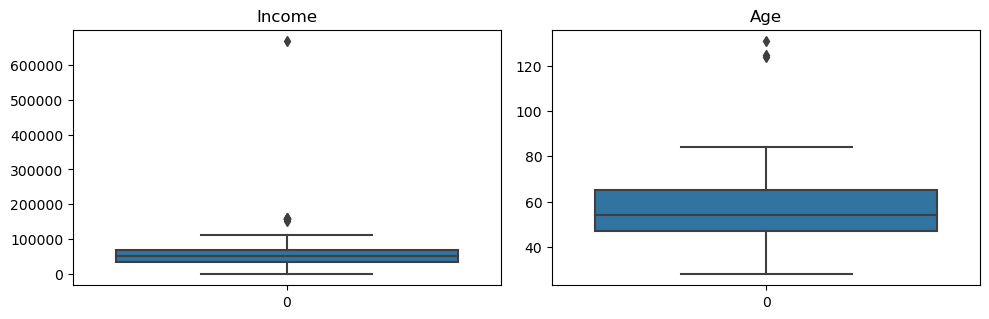

Income Details :
Max Income : 666666.0
Min Income : 1730.0
Person with Income > 200000  : 1

Age Details :
Max Age : 131
Min Age : 28
Person with Age > 90 : 3


In [18]:
# Ploting Outliers
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
sns.boxplot(df.Income)
plt.title('Income')

plt.subplot(2,2,2)
sns.boxplot(df.Age)
plt.title('Age')

plt.tight_layout()
plt.show()

print('Income Details :')
print(f"Max Income : {df.Income.max()}")
print(f"Min Income : {df.Income.min()}")
print(f"Person with Income > 200000  : {(df.Income > 200000).sum()}")
print()
print('Age Details :')
print(f"Max Age : {df.Age.max()}")
print(f"Min Age : {df.Age.min()}")
print(f"Person with Age > 90 : {(df.Age > 90).sum()}")

In [19]:
# Replacing Outliers by upper cap values
def handle_outler(df,feature):
    # Calculating IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    # Calculating Lower & Upper Bound
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    # If data has Outlier changing it with Upper_Bound
    df[feature] = np.where(df[feature]>upper_bound,upper_bound,df[feature])
    
handle_outler(df,'Age')
handle_outler(df,'Income')

df.head()

Education Marital_Status   Income  Recency  Wines  Fruits  Meat  Fish  \
0      Graduate         Single  58138.0       58    635      88   546   172   
1      Graduate         Single  46344.0       38     11       1     6     2   
2      Graduate        Married  71613.0       26    426      49   127   111   
3      Graduate        Married  26646.0       26     11       4    20    10   
4  PostGraduate        Married  58293.0       94    173      43   118    46   

   Sweets  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      88    88                  3                8                   10   
1       1     6                  2                1                    1   
2      21    42                  1                8                    2   
3       3     5                  2                2                    0   
4      27    15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0         0         1   
1             0             0             0         0         0   
2             0             0             0         0         0   
3             0             0             0         0         0   
4             0             0             0         0         0   

   Customer_Seniority   Age  TotalSpent  Children  TotalMembers  
0           94.714286  67.0        1617         0             1  
1           16.142857  70.0          27         2             3  
2           44.571429  59.0         776         0             2  
3           19.857143  40.0          53         1             3  
4           23.000000  43.0         422         1             3

### Numerical & Categorical features

In [20]:
# Categorical Features
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
print(f"Numbers of Categorical Features : {len(categorical_features)}")

# Numerical Features
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
print(f"Numbers of Numerical Features : {len(numerical_features)}")

Numbers of Categorical Features : 2
Numbers of Numerical Features : 25


## 1.4 Data Visualization

### 1.4.1 Univariate Analysis

- Separating Discrete & Continuous Feature

In [21]:
# Function to separate discrete and continuous features in original data.
def divide_feature_types(data):
    # Initialize
    Continues_feature = [] 
    Discrete_feature = [] 
    # loop through and separate columns
    for feature in data.columns: 
        if any(substring in feature for substring in ['home', 'Num', 'Accepted', 'Complain', 'Response', 'Is_Parent', 'TotalMembers', 'Children']):
            Discrete_feature.append(feature)
        elif data[feature].dtype == 'O':
            Discrete_feature.append(feature)
        else:
            Continues_feature.append(feature)
    return Continues_feature, Discrete_feature

# Call the function and get column lists
Continues_feature, Discrete_feature = divide_feature_types(df)
print('Continuous numerical features: ', Continues_feature)
print('No. of Continuous features: ', len(Continues_feature))
print('\nCategorical or discrete features: ', Discrete_feature)
print('No. of Discrete features: ', len(Discrete_feature))

Continuous numerical features:  ['Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Customer_Seniority', 'Age', 'TotalSpent']
No. of Continuous features:  11

Categorical or discrete features:  ['Education', 'Marital_Status', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Children', 'TotalMembers']
No. of Discrete features:  16


### a) Discrete Features Visualization

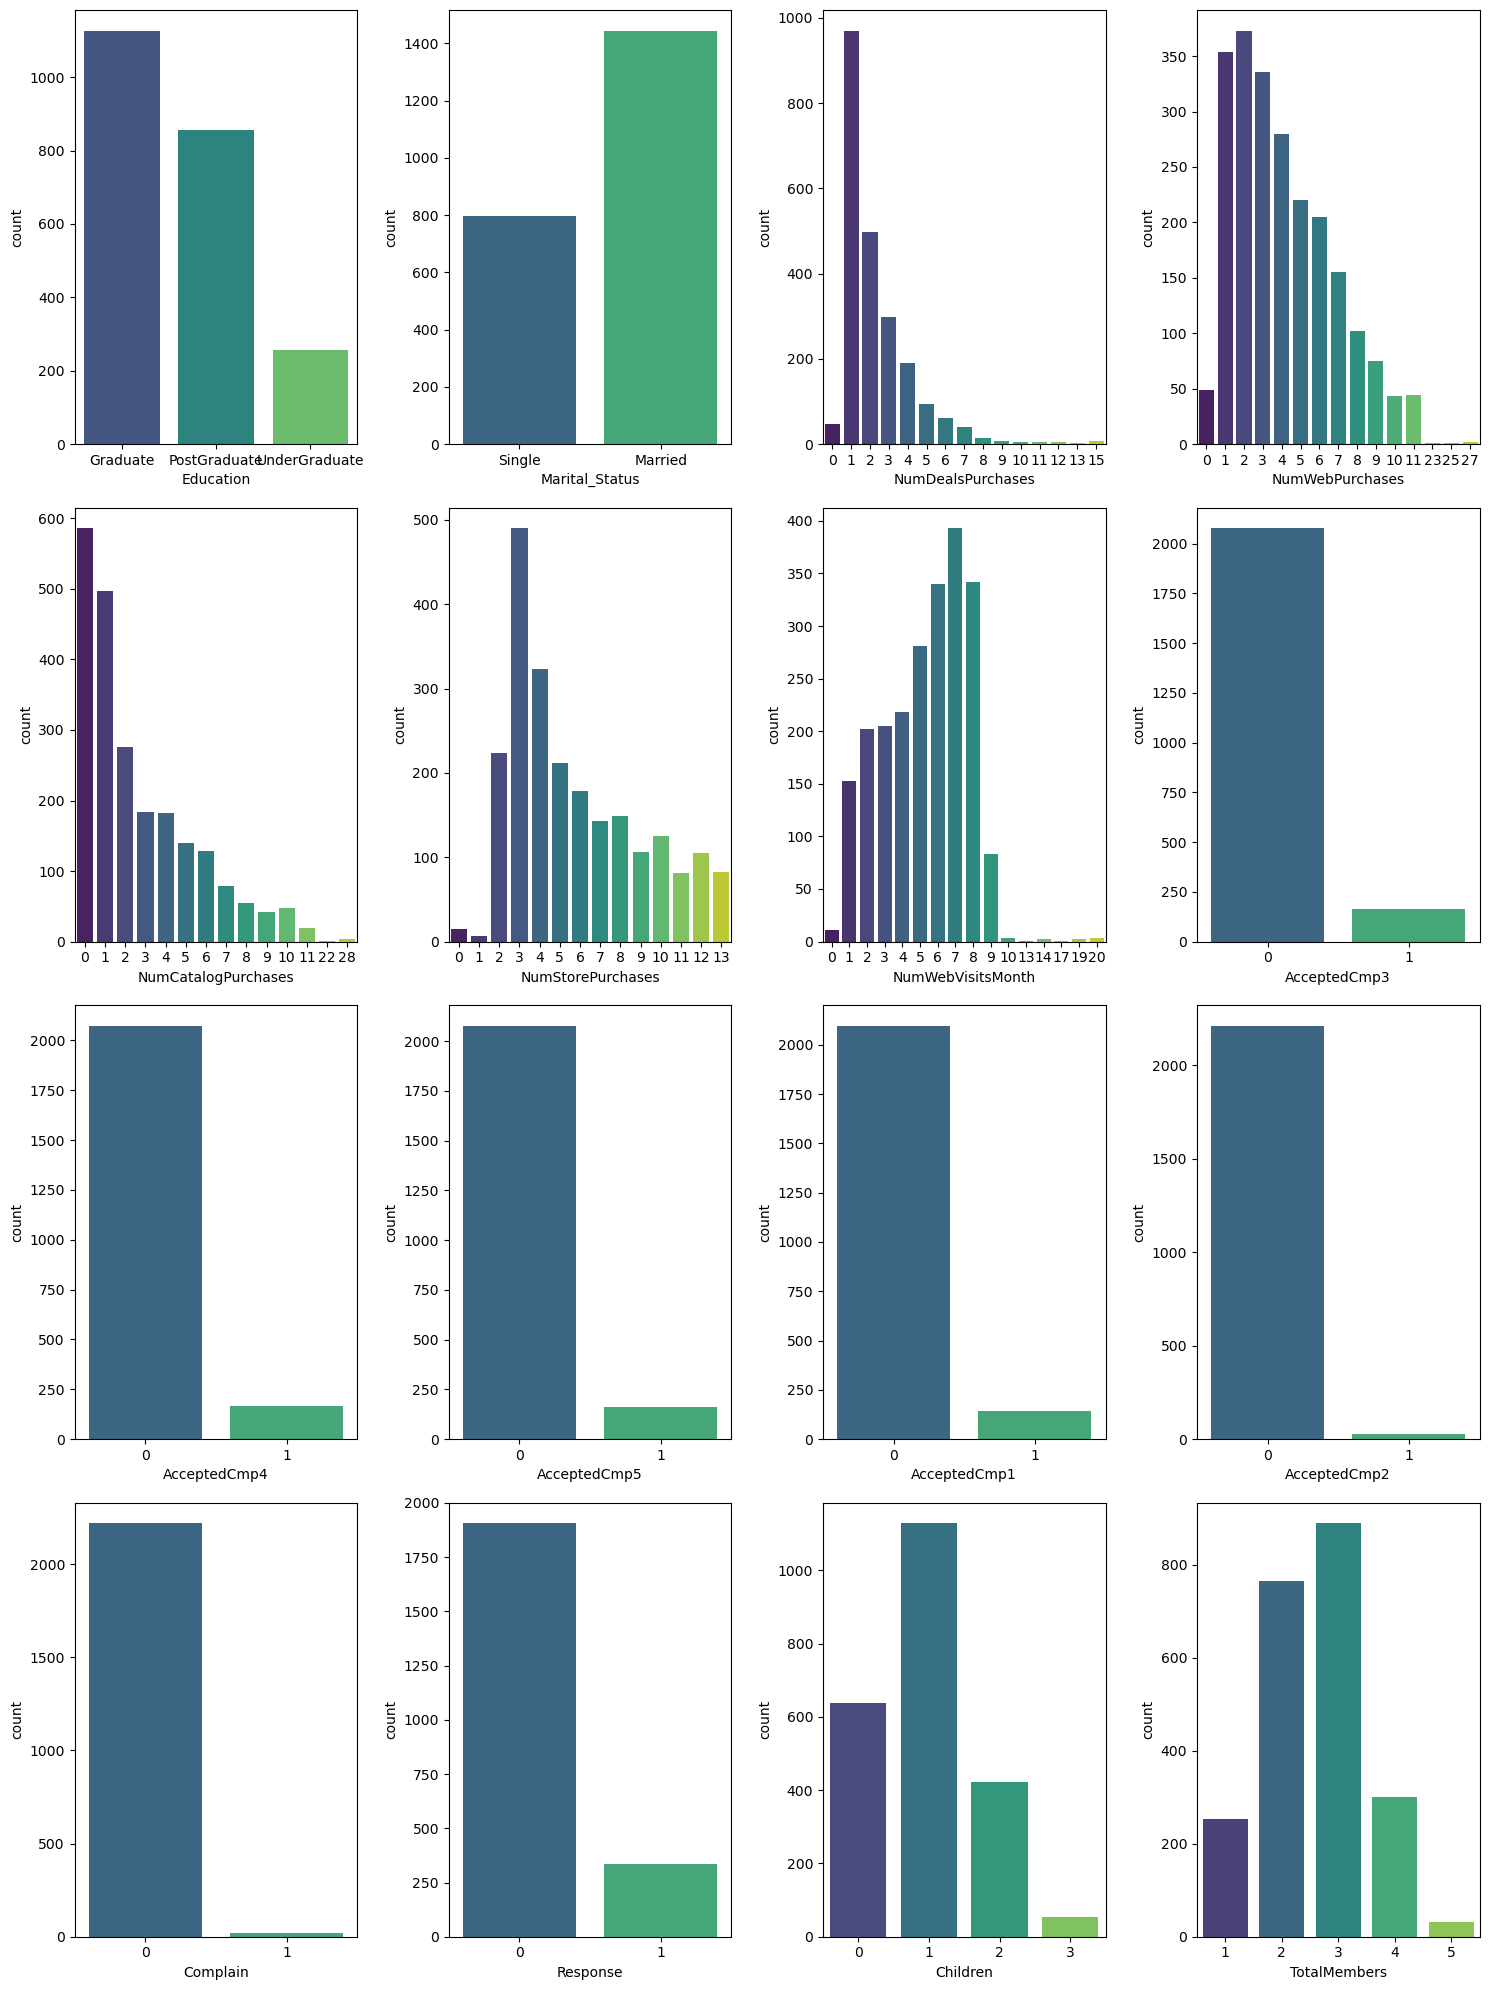

In [22]:
# Calculate the number of rows needed
num_rows = (len(Discrete_feature)) // 4

# Create subplots with 2 plots in each row
fig, axes = plt.subplots(num_rows, 4, figsize=(15, 5 * num_rows))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each feature
for i, feature in enumerate(Discrete_feature):
    # Create the main subplot for the histogram
    ax = axes[i]

    # Plot the CountPLot
    sns.countplot(x=feature, data=df,palette='viridis', label='Countplot', ax=ax)

plt.tight_layout()
plt.show()

***Observation :***
1. Most of the customers are Graduate and then Post Graduate.
2. Most of the customers are Married.
3. Number of Deals, Webs and Catalog Purchases are high for 1 and then 2,3 and so on reducing.
4. Most of the customers visits 5 to 8 times per Months.
5. There are very less complaint.
6. Verty less number of customers have 3 Childrens.
7. Most of the customer has Total 2 ro 3 membars.
8. Most of the customers have not accepted Campagins.

### b) Continuous Features Visualization

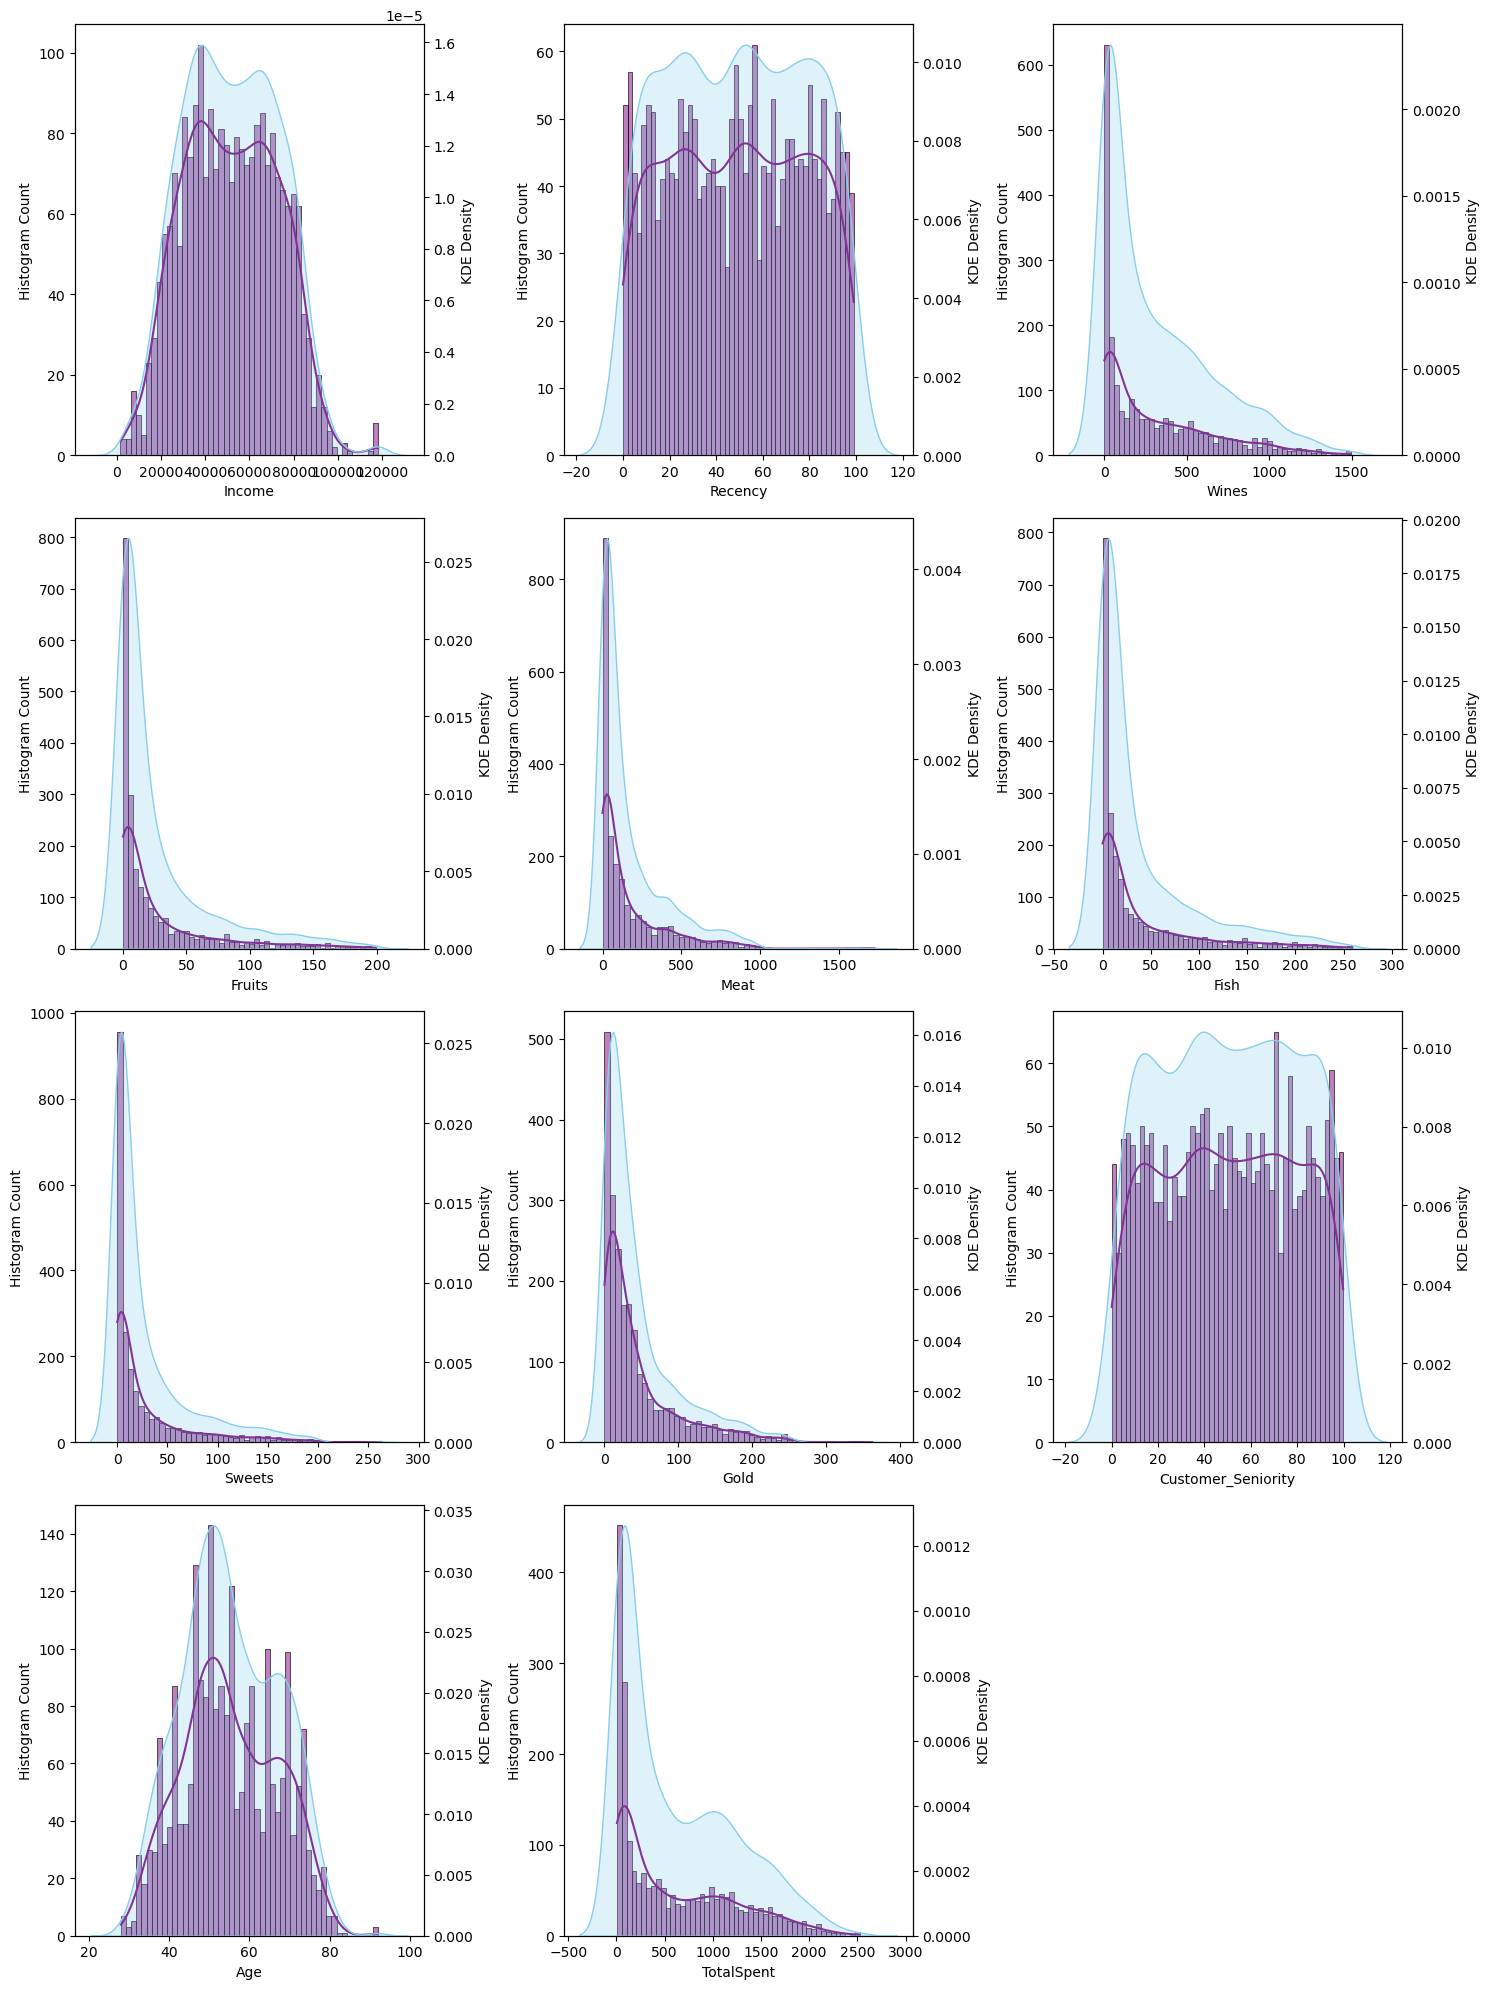

In [23]:
# Calculate the number of rows needed
num_rows = (len(Continues_feature) + 2) // 3  # Add 2 to handle the extra plot case

# Create subplots with 2 plots in each row
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each feature
for i, feature in enumerate(Continues_feature):
    # Create the main subplot for the histogram
    ax = axes[i]

    # Plot the histogram
    sns.histplot(df[feature], bins=50, kde=True, color='purple', label='Histogram', ax=ax)

    # Create the secondary subplot for the KDE plot
    ax2 = ax.twinx()

    # Plot the KDE plot on the secondary y-axis
    sns.kdeplot(df[feature], fill=True, color='skyblue', label='KDE', ax=ax2)
    
    # Set labels for the axes
    ax.set_ylabel('Histogram Count')
    ax2.set_ylabel('KDE Density')

    # Set labels for the x-axis
    ax.set_xlabel(feature)

# Hide extra empty subplots if any
for j in range(len(Continues_feature), num_rows * 3):
    axes[j].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


***Observation :*** 
1. Income and Age shows some sort of Normal Distribution. Mostly the income of the customers are between 20k to 1 lakh. Most of the customers Age is 40 tom 70.
2. Recency and Customer_Seniority has uniform Distribution with some high and low values, but nothing to strange.
3. All the products like Wines, Fruits, Meat, Fish, Sweets, Gold and including TotalSpend as well following the Right-Skewed Distribution.

### 1.4.2 Bivariate Analysis

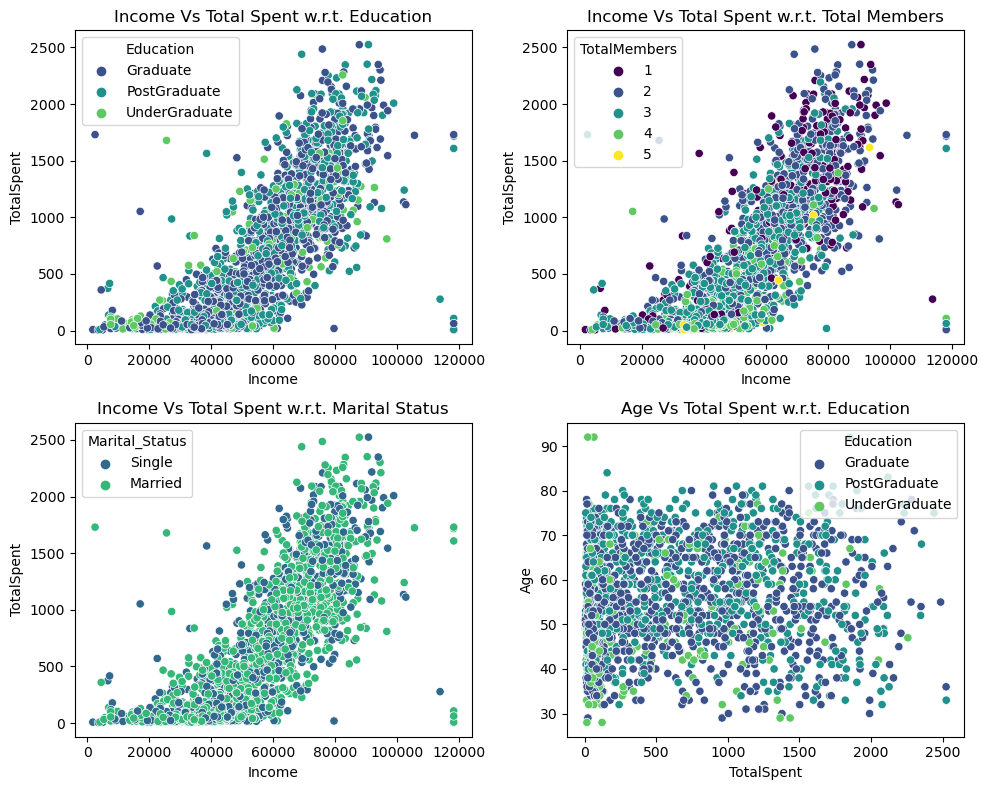

In [24]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title('Income Vs Total Spent w.r.t. Education')
sns.scatterplot(x='Income',y='TotalSpent',data=df,hue='Education',palette='viridis')

plt.subplot(2,2,2)
plt.title('Income Vs Total Spent w.r.t. Total Members')
sns.scatterplot(x='Income',y='TotalSpent',data=df,hue='TotalMembers',palette='viridis')

plt.subplot(2,2,3)
plt.title('Income Vs Total Spent w.r.t. Marital Status')
sns.scatterplot(x='Income',y='TotalSpent',data=df,hue='Marital_Status',palette='viridis')

plt.subplot(2,2,4)
plt.title('Age Vs Total Spent w.r.t. Education')
sns.scatterplot(x='TotalSpent',y='Age',data=df,hue='Education',palette='viridis')

plt.tight_layout()
plt.show()

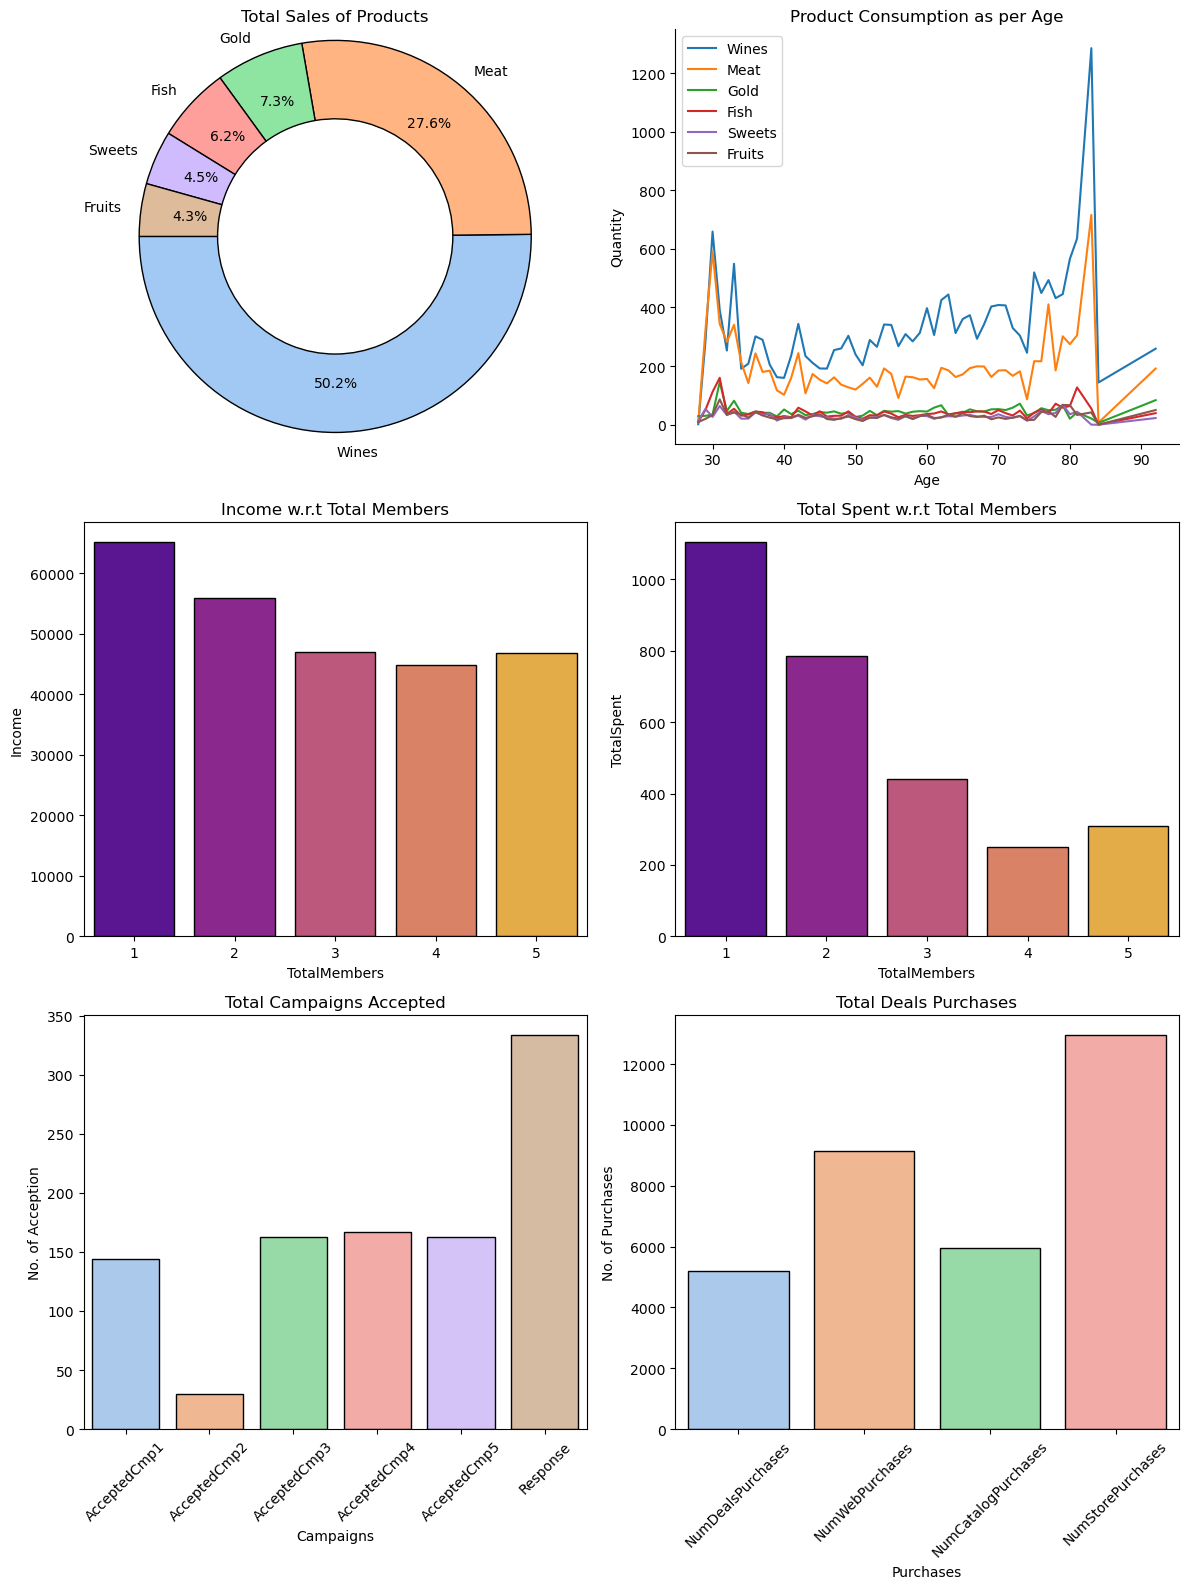

In [25]:
plt.figure(figsize=(12,16))

plt.subplot(3,2,1)
# List of products
Products = ['Wines','Meat','Gold','Fish','Sweets','Fruits']
# Calculating Purchases
total_sales = df[Products].sum()
# Define custom colors for the pie chart
custom_colors = sns.color_palette('pastel')
# Create a pie plot
plt.pie(total_sales.values, labels=total_sales.index,pctdistance=0.75,startangle=180, autopct='%1.1f%%', colors=sns.color_palette(custom_colors, len(Products)),wedgeprops=dict(width=0.4,edgecolor='black'))
plt.title('Total Sales of Products')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.subplot(3,2,2)
for product in Products:
    sns.lineplot(x='Age',y=product,data=df,ci=None,label=product)
plt.xlabel("Age")
plt.ylabel("Quantity")
sns.despine()
plt.title("Product Consumption as per Age")

plt.subplot(3,2,3)
sns.barplot(y='Income',x='TotalMembers',data=df,palette='plasma',ci=None,edgecolor='black')
plt.title("Income w.r.t Total Members")

plt.subplot(3,2,4)
sns.barplot(y='TotalSpent',x='TotalMembers',data=df,palette='plasma',ci=None,edgecolor='black')
plt.title("Total Spent w.r.t Total Members")

plt.subplot(3,2,5)
# List of products
camps = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
# Calculating Accepted Campaigns
total_camp = df[camps].sum()
# Create a bar plot
sns.barplot(x=total_camp.index, y=total_camp.values, palette='pastel',edgecolor='black')
# Customize the plot
plt.title('Total Campaigns Accepted')
plt.xlabel('Campaigns')
plt.ylabel('No. of Acception')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.subplot(3,2,6)
# List of Purchases
purchases = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
# Calculating purchases
total_purchases = df[purchases].sum()
# Creating Barplot
sns.barplot(x=total_purchases.index,y=total_purchases.values, palette='pastel',edgecolor='black')
# Customize the plot
plt.title('Total Deals Purchases')
plt.xlabel('Purchases')
plt.ylabel('No. of Purchases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

***Observation :***
1. Mostly, Customer with higher Education and less number of family members has the high Income as well as Spent.
2. Most of the customers spend less than 1500.
3. From all the product categories, Wines has the highest sale and then followed by Meat and Gold. We may here conclude that the data may be of Wines shop which has meat as secondry product and Gold, FIsh, Sweets and Fruits are the side Products.
4. We observe that customers in the age group of 75-85 has consume high quantity of Wines and then followed by Meat.And also customers in the age group of 25-35 has little high consumption rate. Where as quantity of other products remains somewhere constant. Here, we can conclude that Most of the customer who purchases the Wines purchase the Meat as well.
5. Response has the highest Acceptance and Campagin has lowest Acceptance.
6. Customers mostly prefer Store Purchases and then Web Purchases.

### 1.4.3 Mutivariate Analysis

### a) Pair Plot based on Marital Status

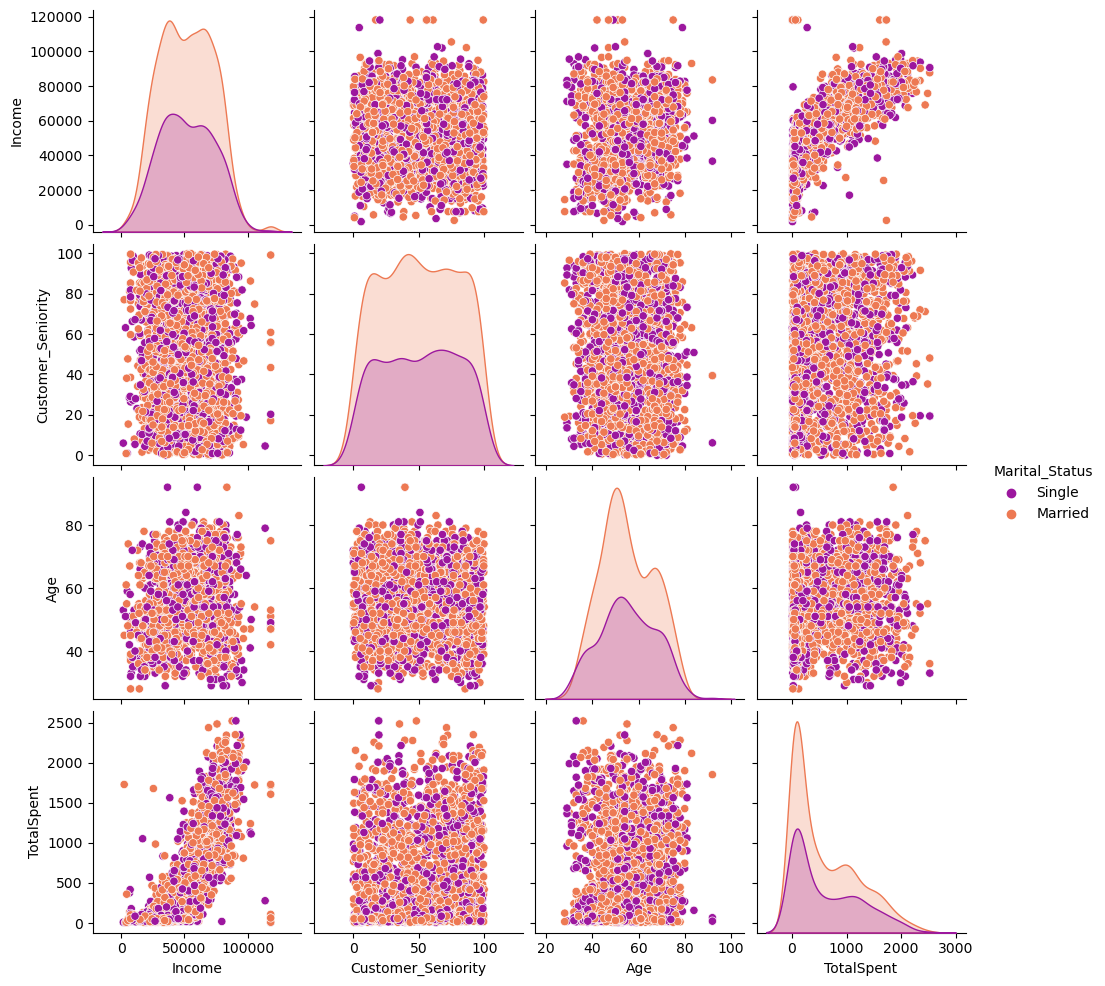

In [26]:
# List of features used for pair plot
columns = ['Education','Income','Marital_Status','Customer_Seniority','Age','TotalSpent']

sns.pairplot(df[columns], hue='Marital_Status',palette='plasma')
plt.show()

### b) Pair Plot based on Education

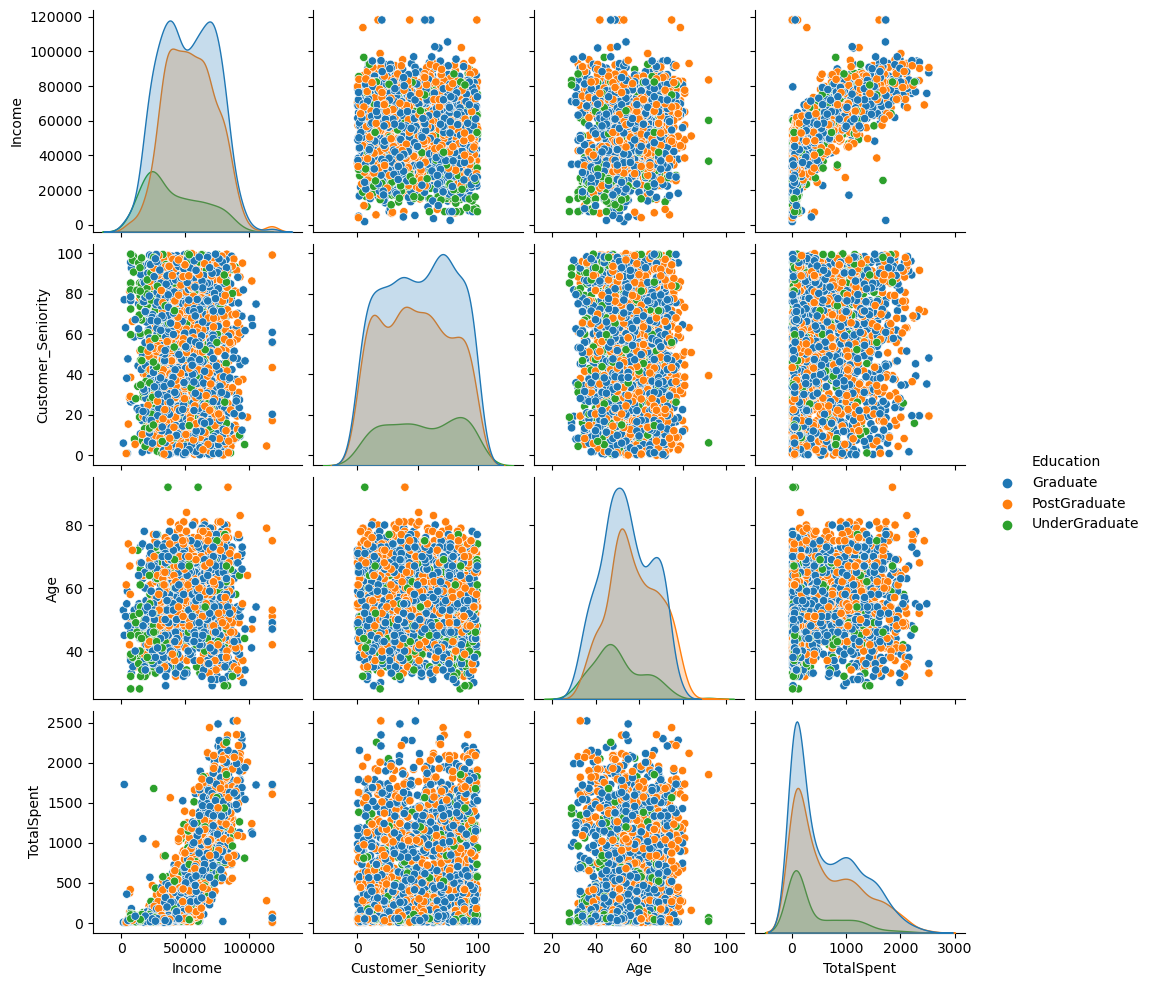

In [27]:
# List of features used for pair plot
columns = ['Education','Income','Marital_Status','Customer_Seniority','Age','TotalSpent']

# Create the pairplot
sns.pairplot(df[columns], hue='Education')

# Show the plot
plt.show()

### c) HeatMap

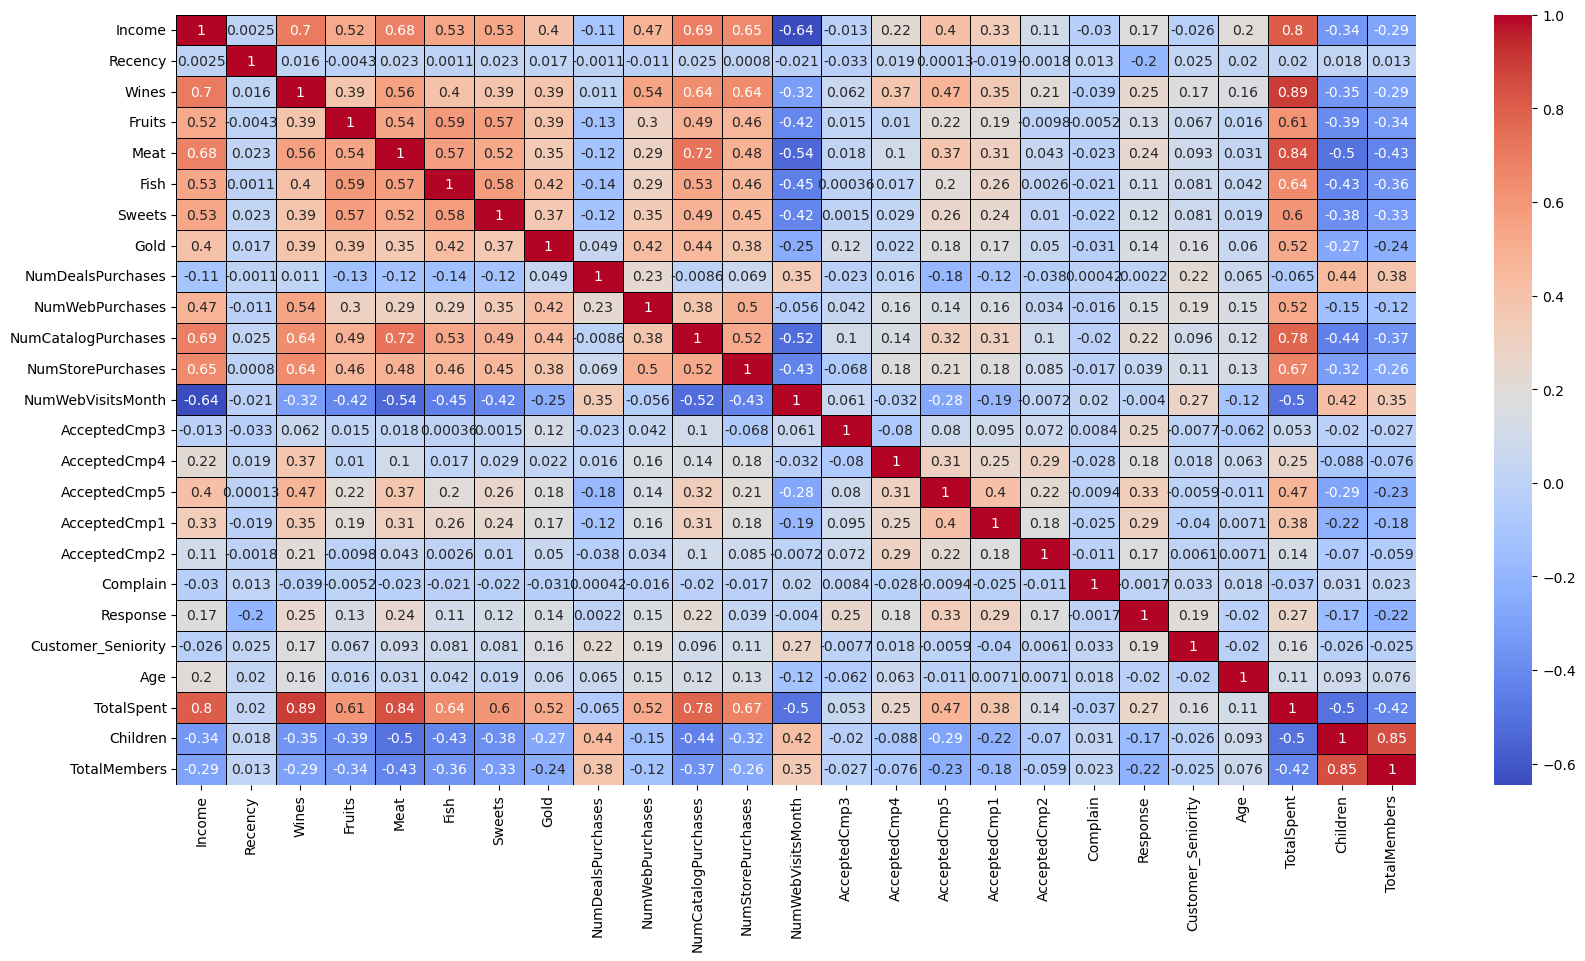

In [28]:
# Heat Map Visualization
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=0.5,linecolor='black')
plt.show()

# 2. Data Preprocessing

### Reducing Dimension
- Creating some of the combnined features to reduce the dimensions

In [29]:
# Creating a new feature Other_Product to store all the Products rather than Wines and Meat.
df['Other_Product'] = df['Fruits']+df['Fish']+df['Sweets']+df['Gold']
df.drop(['Fruits','Fish','Sweets','Gold'],axis=1,inplace=True)

# Creating a new feature Campaigns_Accepted to store all the accecpted campaigns.
df['Campaigns_Accepted'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],axis=1,inplace=True)

# Creating a new feature Total_Purchases to store all the Purchases.
df['Total_Purchases'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df.drop(['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'],axis=1,inplace=True)


### Converting Categorical to Numerical Features
- Insted of Label Encoding on the Categorical Features - ***Education & Marital_Status*** , I am appling the manual mapping to keep the importance of the category.

In [30]:
# Creating instance varibale
df['Marital_Status'] = df.Marital_Status.map({'Single':0,'Married':1})
df['Education'] = df.Education.map({'UnderGraduate':0,'Graduate':1,'PostGraduate':2})

### Feature Scaling
- Feature Scaling on the Continues Numerical features - *Income,TotalSpent,Age,Recency,Wines,Fruits	Meat,Fish,Sweets,Gold*

Here we are going with both Standard Scaler as well as MinMax Scaler, we'll see which one is good for our model.

#### 1. Standard Scaler

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_std = pd.DataFrame(scaled_data,columns=df.columns)
df_std.head(3)

Education  Marital_Status    Income   Recency     Wines      Meat  \
0  -0.410013       -1.346874  0.302820  0.307039  0.983781  1.679702   
1  -0.410013       -1.346874 -0.257948 -0.383664 -0.870479 -0.713225   
2  -0.410013        0.742460  0.943515 -0.798086  0.362723 -0.177032   

   NumWebVisitsMonth  Complain  Customer_Seniority       Age  TotalSpent  \
0           0.693904 -0.097282            1.531185  1.007064    1.679417   
1          -0.130463 -0.097282           -1.190545  1.261969   -0.961275   
2          -0.542647 -0.097282           -0.205773  0.327318    0.282673   

   Children  TotalMembers  Other_Product  Campaigns_Accepted  Total_Purchases  
0 -1.264505     -1.759115       2.044947            0.621248         1.320826  
1  1.396361      0.446548      -0.848389           -0.501912        -1.154596  
2 -1.264505     -0.656283       0.598279           -0.501912         0.799685

#### 2. MinMax Scaler

In [32]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df_minmax = pd.DataFrame(scaled_data,columns=df.columns)
df_minmax.head(3)

Education  Marital_Status    Income   Recency     Wines      Meat  \
0        0.5             0.0  0.484558  0.585859  0.425318  0.316522   
1        0.5             0.0  0.383245  0.383838  0.007368  0.003478   
2        0.5             1.0  0.600312  0.262626  0.285332  0.073623   

   NumWebVisitsMonth  Complain  Customer_Seniority       Age  TotalSpent  \
0               0.35       0.0            0.948498  0.609375    0.639683   
1               0.25       0.0            0.161660  0.656250    0.008730   
2               0.20       0.0            0.446352  0.484375    0.305952   

   Children  TotalMembers  Other_Product  Campaigns_Accepted  Total_Purchases  
0  0.000000          0.00       0.579017                 0.2         0.568182  
1  0.666667          0.50       0.013280                 0.0         0.136364  
2  0.000000          0.25       0.296149                 0.0         0.477273

### Correlation Matrix

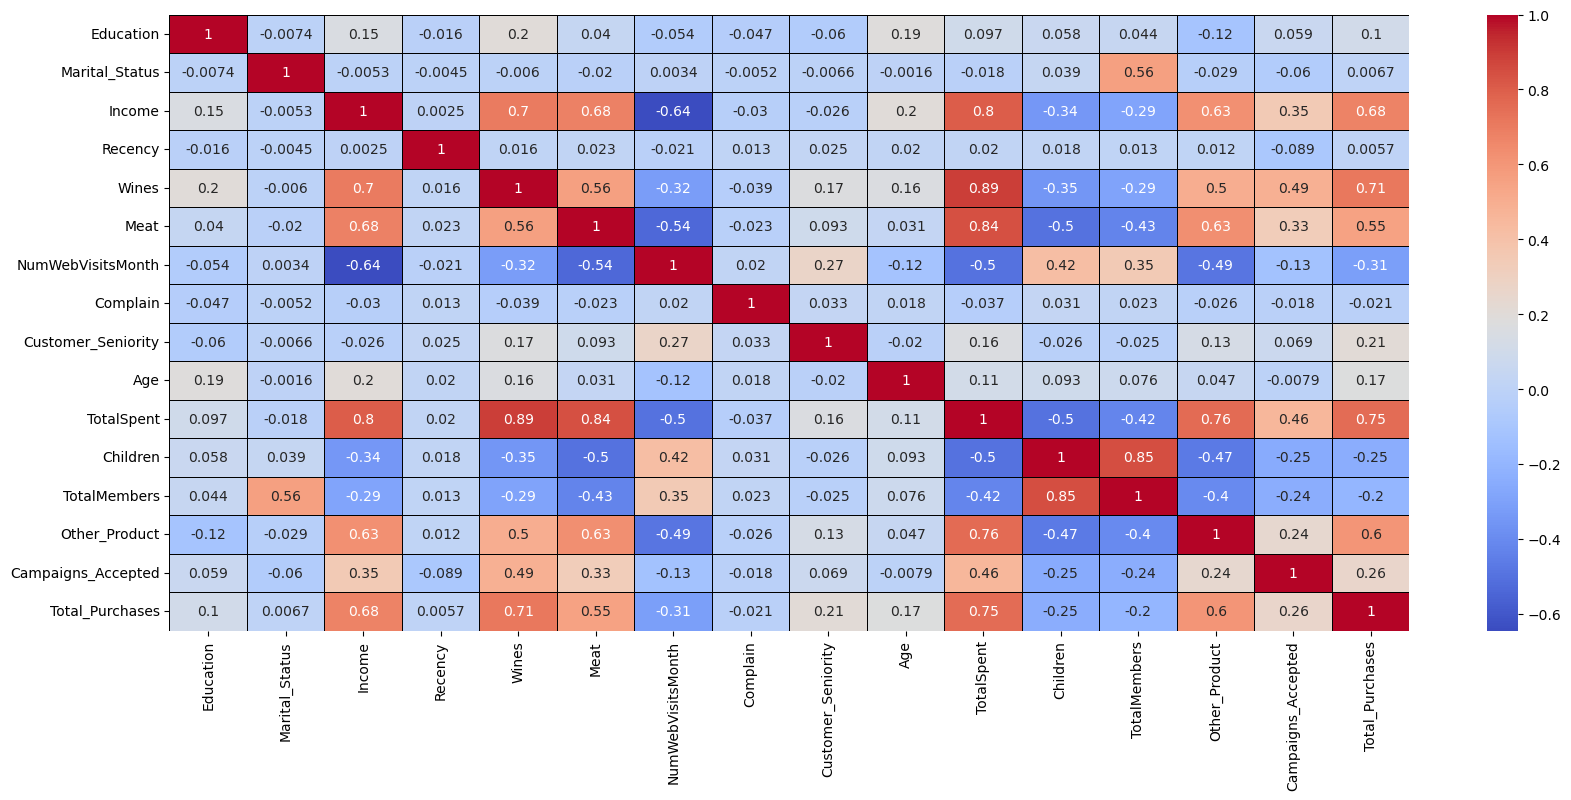

In [33]:
# As our data is not linearly distributed we are using Spearman Correlation Method.
corr = df.corr()

plt.figure(figsize=(20,8))
sns.heatmap(data=corr,cmap='coolwarm',annot=True,linewidths=0.5,linecolor='black')
plt.show()

# 3. Model  Building

## 3.1 Principal Component Analysis (PCA)

### 3.1.1 PCA for visualization

In [34]:
# PCA with 2-D visualization
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# For Standard scaled data
pca = PCA(n_components=2)
pca_std = pca.fit_transform(df_std)
PCA_viz_std = pd.DataFrame(pca_std,columns=(['Dimension 1','Dimension 2']))

# For MinMax scaled data
pca = PCA(n_components=2)
pca_std = pca.fit_transform(df_minmax)
PCA_viz_minmax = pd.DataFrame(pca_std,columns=(['Dimension 1','Dimension 2']))

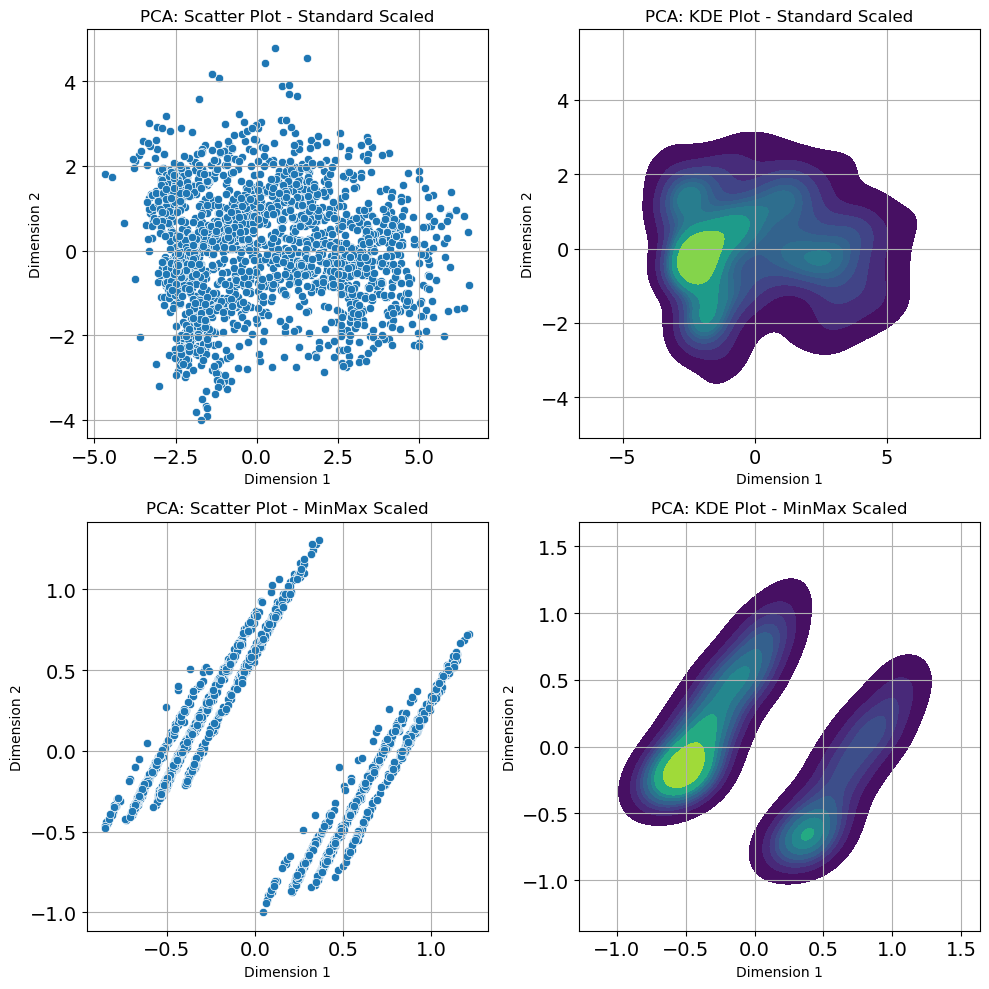

In [35]:
# Visualize data with 2-D PCA with scaled data
fig,axes = plt.subplots(2,2, figsize=(10,10))

# For Standard Scaler
# Scatter Plot
sns.scatterplot(x=PCA_viz_std['Dimension 1'],y=PCA_viz_std['Dimension 2'],ax=axes[0][0])
axes[0][0].set_title('PCA: Scatter Plot - Standard Scaled')
axes[0][0].set_xlabel('Dimension 1')
axes[0][0].set_ylabel('Dimension 2')
axes[0][0].grid(True)

# KDE Plot
sns.kdeplot(x=PCA_viz_std['Dimension 1'], y=PCA_viz_std['Dimension 2'],cmap='viridis',fill=True, ax=axes[0][1])
axes[0][1].set_title('PCA: KDE Plot - Standard Scaled')
axes[0][1].set_xlabel('Dimension 1')
axes[0][1].set_ylabel('Dimension 2')
axes[0][1].grid(True)

# For Standard Scaler
# Scatter Plot
sns.scatterplot(x=PCA_viz_minmax['Dimension 1'],y=PCA_viz_minmax['Dimension 2'],ax=axes[1][0])
axes[1][0].set_title('PCA: Scatter Plot - MinMax Scaled')
axes[1][0].set_xlabel('Dimension 1')
axes[1][0].set_ylabel('Dimension 2')
axes[1][0].grid(True)

# KDE Plot
sns.kdeplot(x=PCA_viz_minmax['Dimension 1'], y=PCA_viz_minmax['Dimension 2'],cmap='viridis',fill=True, ax=axes[1][1])
axes[1][1].set_title('PCA: KDE Plot - MinMax Scaled')
axes[1][1].set_xlabel('Dimension 1')
axes[1][1].set_ylabel('Dimension 2')
axes[1][1].grid(True)

# Adjust ticks font size
for ax in axes.flatten():
    ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

***Observation :*** MinMax Scaler is not suitable for this dataset, while using MinMax Scaled Dataset it create two distinct group quit far from each other, the distance is around 1. This happens because MinMax scaling treats binary features differently, keeping a fixed distance of 1 between individuals who are in different categories. As a result, it might not be the best choice for this dataset.

### 3.1.2 PCA for Feature Enginerring

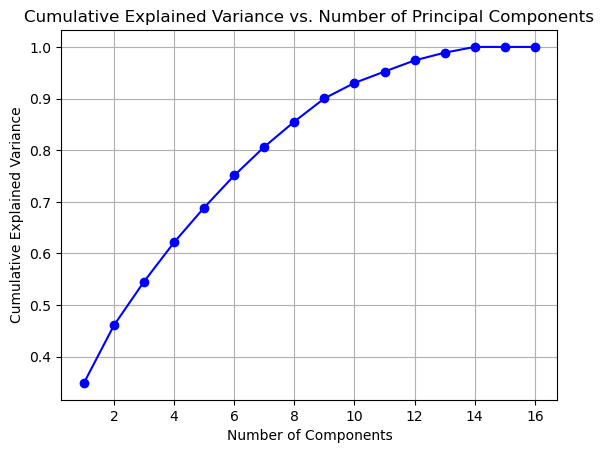

In [36]:
cum_vars=[]
component_coefs=[]
for i in range(1, len(df_std.columns)+1): 
    pca = PCA(n_components=i)
    pca.fit(df_std)

    # Get the cumulative explained variance
    component_coefs.append(pca.components_[i-1,:])
    cum_var = np.cumsum(pca.explained_variance_ratio_)[-1]
    cum_vars.append(cum_var)
    
# Plot cumulative explained variance vs. number of components
plt.plot(range(1, len(df_std.columns)+1), cum_vars, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')

# Show the plot
plt.grid()
plt.show()

***Observation :*** It seems that variance wouldn't be explained by a few dimensions. Thus, we can't simply use the variance to choose Number of dimensions. In this case, a closer look at how PCA built each principal components (hence, the coefficients) would help us to decide. We want the model to include the dimensions that we think are relevant for clustering.

#### Creating Heat Map for Each Components

In [37]:
# Extract feature names
feature_names = df_std.columns

# Initialize an empty DataFrame to store principal components' coefficients
components_df = pd.DataFrame(index=feature_names)

# Iterate through each principal component
for i, component_coefs in enumerate(pca.components_):
    # Create a DataFrame for the current component's coefficients
    component_df = pd.DataFrame({f'Component_{i+1}_Coefficient': component_coefs}, index=feature_names)
    
    # Concatenate the current component's coefficients to the main DataFrame
    components_df = pd.concat([components_df, component_df], axis=1)

# Visualize the principal components' coefficients
components_df.style.background_gradient(cmap='Blues')


***Observation :***
- Here we are taking 70% as a threshold to filter out the highly correlated features.
1. ***1st Component :*** *Income, Wines, Meat, Other_Product, TotalSpent and Total Purchase* having highly positive correlation. So, Here we can consider that 1st component cathes the largest variance and project all points to 1 combined dimension. Here we can conclude that, **Customer with high Income does the high purchase and Spent more on Wines, Meats and other products.**
2. ***2nd Component :*** *Marital Status, Age, Children and Total Members* have the highly correaltion. A common conclusion can be withdrawn from here, Based on Marital Status and the Age of customer they have the Numbers of Member in their Family.
3. ***3rd Component :*** *NumWebVisitsMonth and Customer_Seniority* have the high correlation. We can conclude that, **New customers are mostly active on Web Purchases.**
4. ***4th Component :*** *Education and Age* are the highly correlated features. **Mostly Young customers are Educated.**
5. ***5th Component :*** Recency, Complain, Age Customers with recent purchase of customers of certain age group has a high complains.
6. ***6th to 9th Component :*** *Complain, Education Recency, Campaigns_Accepted, Children, Age* are having high correlation.

- Here, The first 9 components has captured the good number of variance. So, I will consider this 9 components and left the others.

### 3.2 KMeans Model Building

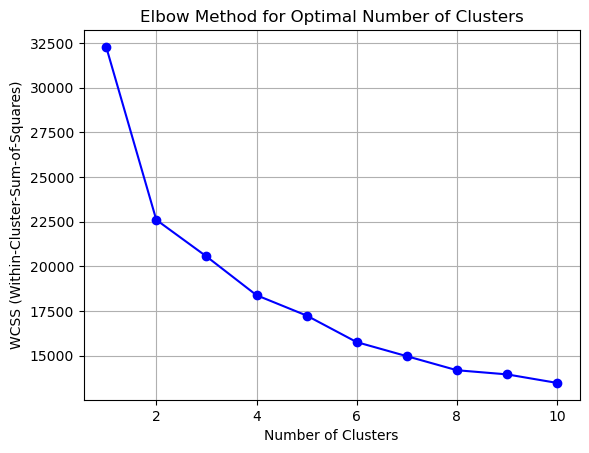

In [38]:
# Elbow method to decide on clustering #s

# PCA with 9 dimension
pca_std = PCA(n_components=9)
pca_std.fit(df_std)
PCA_std =  pd.DataFrame(pca_std.transform(df_std)) 

# Get within-cluster-sum-of-squares for Elbow Method 
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(PCA_std)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.grid()
plt.show()

***Observation :*** Here, we can have 3 or 4 clusters. I tried to used 4 clusters it just give 21 customers in that cluster and its too less, So I will go with 3 Clusters.

In [39]:
# Run K-means with 3 clusters (and PCA with 9 dimensions)

# PCA 
pca_std = PCA(n_components=9)
pca_std.fit(df_std)
PCA_std =  pd.DataFrame(pca_std.transform(df_std)) 

# Kmeans and predictions
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
yhat_km = kmeans.fit_predict(PCA_std)
df["Clusters"]= yhat_km

# 4. Model Evaluations and Interpretations

## 4.1 Model Evaluations

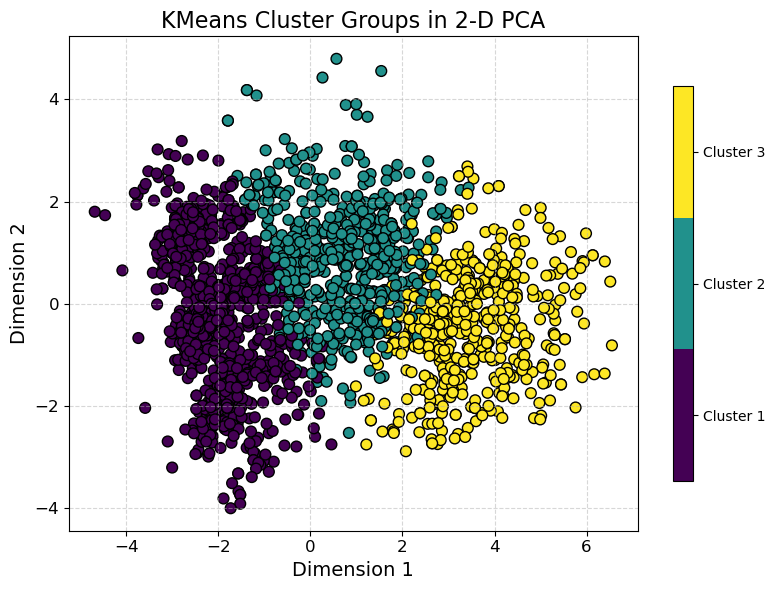

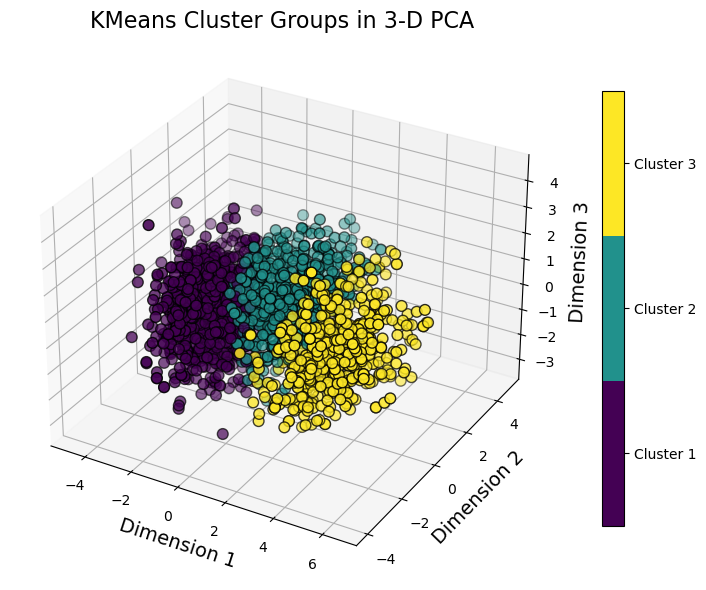

In [40]:
# Plot clustering groups in 2-D PCA
plt.figure(figsize=(8, 6))
# 2-D PCA
pca_std = PCA(n_components=2)
pca_std.fit(df_std)
PCA_viz_std = pd.DataFrame(pca_std.transform(df_std), columns=["Dimension 1", "Dimension 2"])
x, y = PCA_viz_std['Dimension 1'], PCA_viz_std['Dimension 2']

# Plotting the clusters in 2D with the same colormap
scatter = plt.scatter(x, y, s=60, c=df["Clusters"], cmap='viridis', edgecolor='k', marker='o')
plt.title("KMeans Cluster Groups in 2-D PCA", fontsize=16)
plt.xlabel('Dimension 1', fontsize=14)
plt.ylabel('Dimension 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding colorbar for the scatter plot with 3 colors
cbar = plt.colorbar(scatter, ticks=[0, 1, 2], boundaries=np.arange(4) - 0.5,shrink=0.8, orientation='vertical')
cbar.ax.set_yticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot clustering groups in 3-D PCA
fig = plt.figure(figsize=(10, 6))
# 3-D PCA
ax = fig.add_subplot(111, projection='3d')
pca_std_3d = PCA(n_components=3)
pca_std_3d.fit(df_std)
PCA_viz_std_3d = pd.DataFrame(pca_std_3d.transform(df_std), columns=["Dimension 1", "Dimension 2", "Dimension 3"])
x, y, z = PCA_viz_std_3d['Dimension 1'], PCA_viz_std_3d['Dimension 2'], PCA_viz_std_3d['Dimension 3']

# Plotting the clusters in 3D with the same colormap
scatter = ax.scatter(x, y, z, s=60, c=df["Clusters"], cmap='viridis', edgecolor='k', marker='o')
ax.set_title("KMeans Cluster Groups in 3-D PCA", fontsize=16)
ax.set_xlabel('Dimension 1', fontsize=14)
ax.set_ylabel('Dimension 2', fontsize=14)
ax.set_zlabel('Dimension 3', fontsize=14)

# Adding colorbar for the scatter plot with 3 colors
cbar = plt.colorbar(scatter, ticks=[0, 1, 2], boundaries=np.arange(4) - 0.5,shrink=0.8, orientation='vertical')
cbar.ax.set_yticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.tight_layout()
plt.show()

***Observation :*** Here, we can see that the group of count is pretty even. Now, Let's check the counts for each group.

### Creating Bar Plot to Count the No. of Clusters

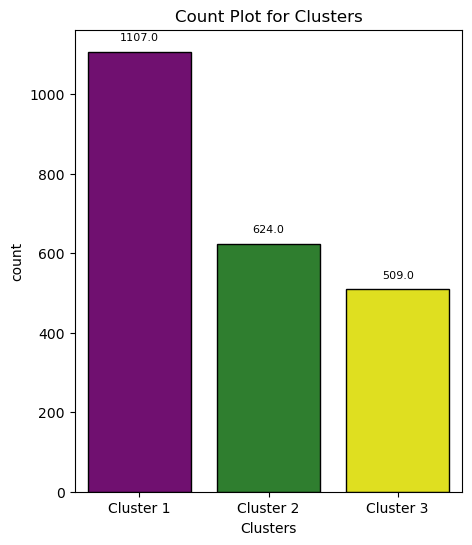

In [41]:
# Define the colors for each cluster
cluster_colors = ['purple', 'forestgreen', 'yellow']

# Create the countplot with specified colors and x-axis labels
plt.figure(figsize=(5, 6))
pl = sns.countplot(x=df["Clusters"], palette=cluster_colors, edgecolor='black')

# Specify custom x-axis tick labels
pl.set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])

# Annotate each bar with its count
for p in pl.patches:
    pl.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)
plt.title("Count Plot for Clusters")
plt.grid(False)
plt.show()

***Observation :*** Here, We can Observe that Cluster 1 has the most of the customers i.e. 1107, then Cluster 2 & 3 has 624 & 509 customers respectively.

## 4.2 Model Interpretation and cluster personality analysis

In [43]:
def divide_feature_types(data):
    # Initialize
    Continues_feature = [] 
    Discrete_feature = [] 
    # loop through and separate columns
    for feature in data.columns: 
        if feature != 'Clusters':
            if any(substring in feature for substring in ['Education', 'Marital_Status', 'Complain', 'Campaigns_Accepted', 'TotalMembers', 'Children']):
                Discrete_feature.append(feature)
            else:
                Continues_feature.append(feature)
    return Continues_feature, Discrete_feature

# Call the function and get column lists
Continues_feature, Discrete_feature = divide_feature_types(df)
print('Continuous numerical features: ', Continues_feature)
print('No. of Continuous features: ', len(Continues_feature))
print('\nCategorical or discrete features: ', Discrete_feature)
print('No. of Discrete features: ', len(Discrete_feature))

Continuous numerical features:  ['Income', 'Recency', 'Wines', 'Meat', 'NumWebVisitsMonth', 'Customer_Seniority', 'Age', 'TotalSpent', 'Other_Product', 'Total_Purchases']
No. of Continuous features:  10

Categorical or discrete features:  ['Education', 'Marital_Status', 'Complain', 'Children', 'TotalMembers', 'Campaigns_Accepted']
No. of Discrete features:  6


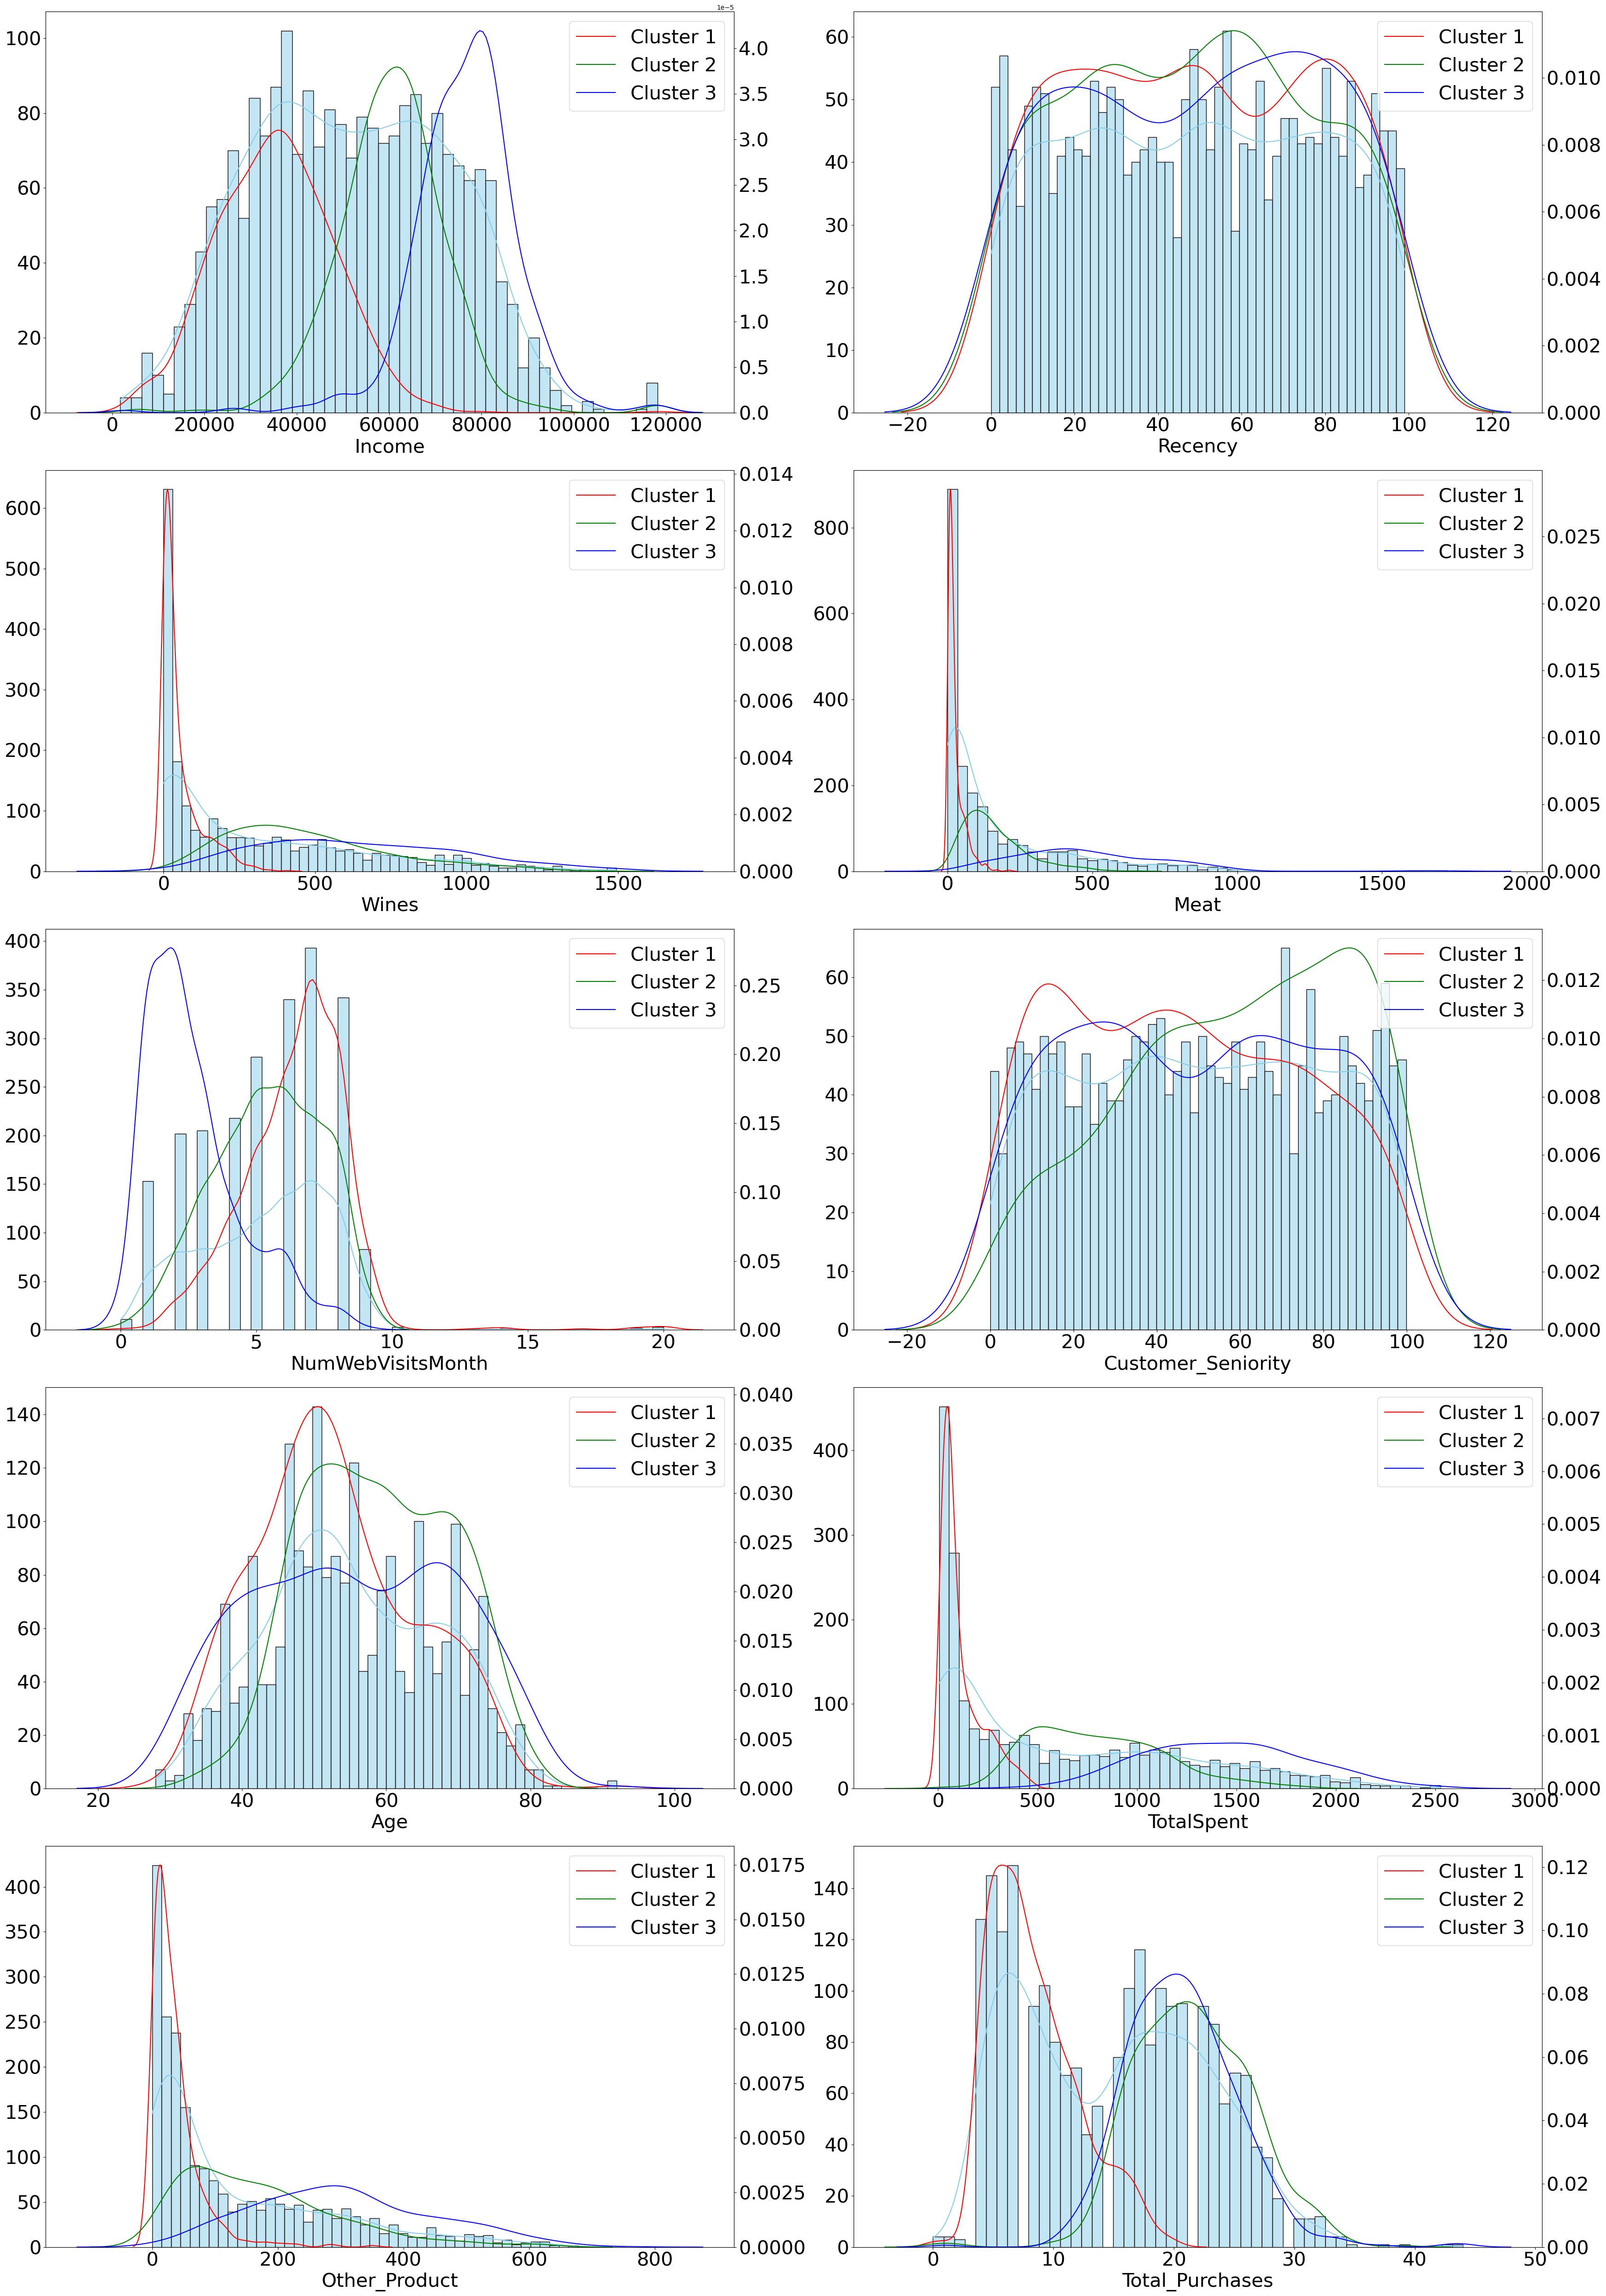

In [44]:
# Histogram and KDE plot for continuous features
grh_per_row = 2
fig, ax = plt.subplots(len(Continues_feature) // grh_per_row, grh_per_row, figsize=(35, 50))

for count, feature in enumerate(Continues_feature, 0):
    data_copy = df.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row

    # Plot histogram with KDE on the primary y-axis
    sns.histplot(data_copy, x=feature, bins=50, kde=True, color='skyblue', ax=ax[row, col])
    ax[row, col].grid(False)
    ax[row, col].set_ylabel("")

    # Plot KDE on the secondary y-axis
    ax2 = ax[row, col].twinx()
    sns.kdeplot(data_copy[data_copy['Clusters'] == 0][feature], color='red', ax=ax2, label='Cluster 1')
    sns.kdeplot(data_copy[data_copy['Clusters'] == 1][feature], color='green', ax=ax2, label='Cluster 2')
    sns.kdeplot(data_copy[data_copy['Clusters'] == 2][feature], color='blue', ax=ax2, label='Cluster 3')
    ax[row, col].set_xlabel(feature, fontsize=30)
    ax2.legend(loc='upper right', fontsize=30)
    ax2.grid(False)
    ax2.set_ylabel("")

    # Adjust axis label size and tick label size
    ax[row, col].tick_params(axis='both', labelsize=30)
    ax2.tick_params(axis='both', labelsize=30)

# Hide extra empty subplots
for i in range(len(Continues_feature), len(ax.flatten())):
    ax.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

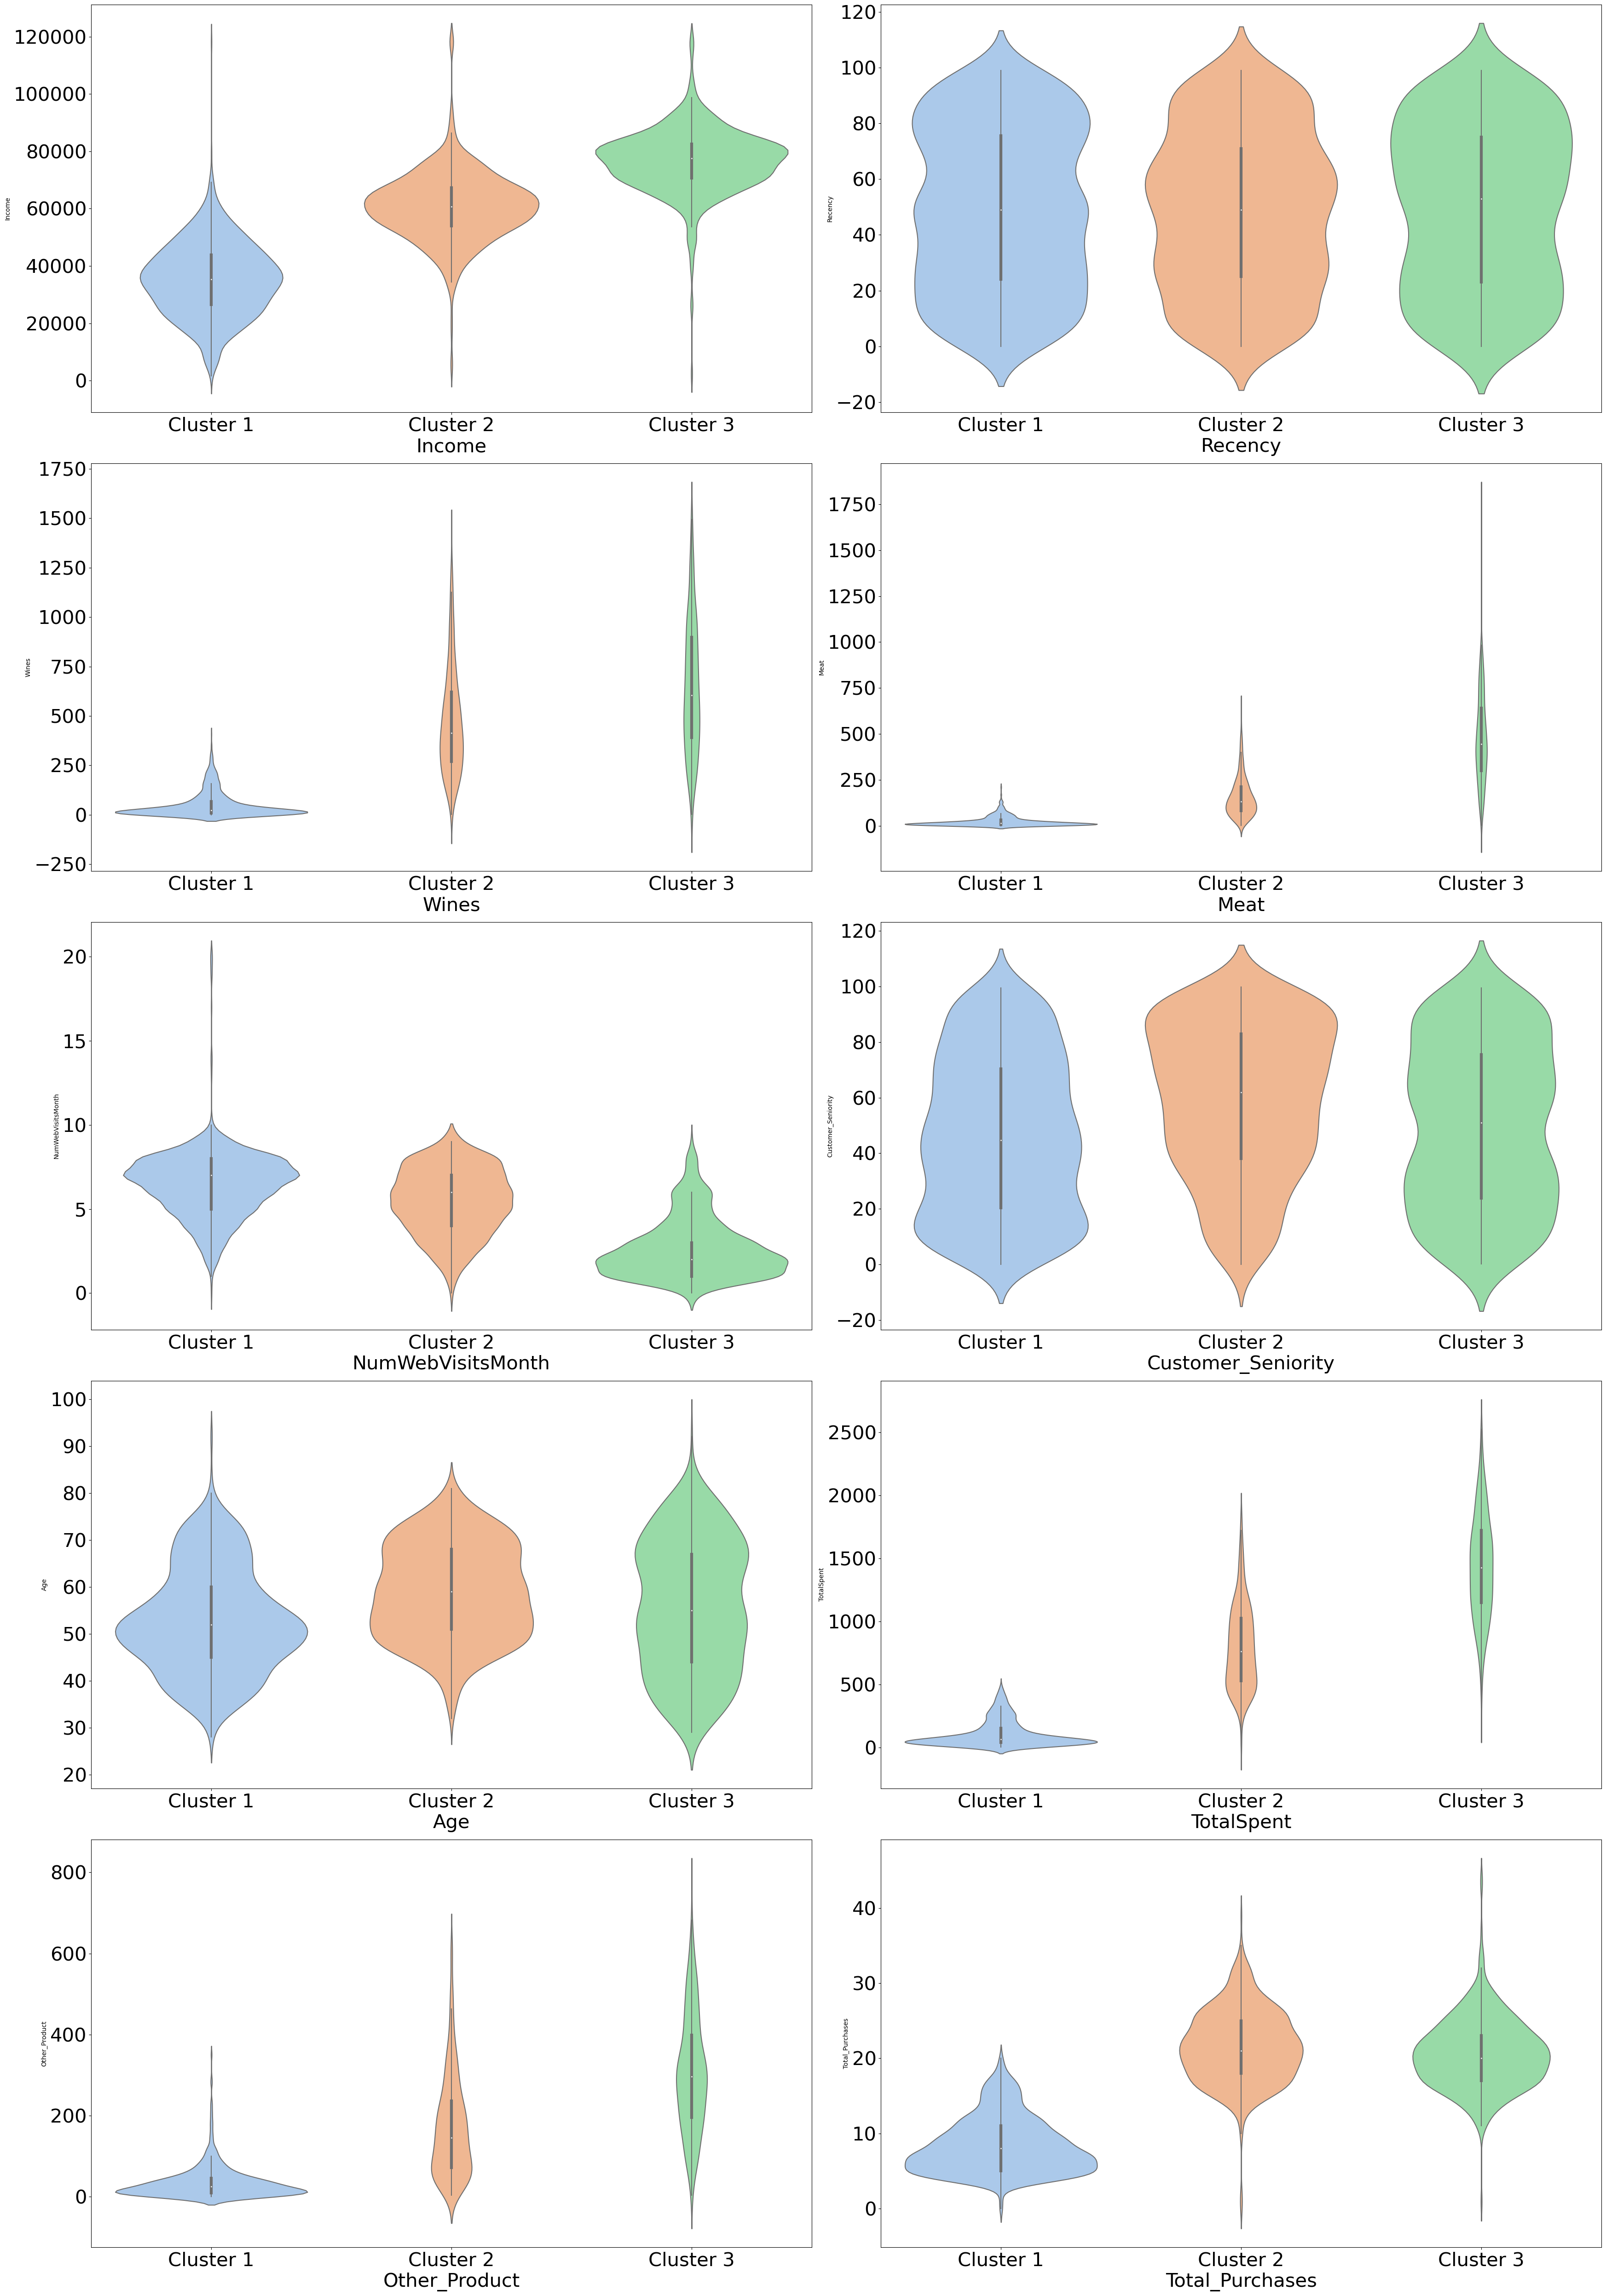

In [45]:
# Violin plot for continuous features
# Number of subplots per row
grh_per_row = 2

# Create subplots
fig, ax = plt.subplots(len(Continues_feature) // grh_per_row, grh_per_row, figsize=(35, 50))

# Loop through each continuous numerical feature
for count, feature in enumerate(Continues_feature, 0):
    row = count // grh_per_row
    col = (count) % grh_per_row
    ylim = max(df[feature].max(), abs(df[feature].min()))

    # Plot violin plot with specific colors for each cluster
    pl = sns.violinplot(x='Clusters', y=feature, data=df, ax=ax[row, col],palette='pastel')
    
    # Specify custom x-axis tick labels
    pl.set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])

    ax[row, col].tick_params(axis='x')  # Rotate x-axis labels
    ax[row, col].set_title(f'Violin Plot: {feature}')
    ax[row, col].set_title('')

    # Adjust axis label size and tick label size
    ax[row, col].tick_params(axis='both', labelsize=30)
    #ax[row, col].set_ylabel('Clusters', fontsize=30)
    ax[row, col].set_xlabel(feature, fontsize=30)

# Adjust layout
plt.tight_layout()
plt.show()

***Observations :***
1. Cluster 1 has the lowest Income & Cluster 2 has the highest Income.
2. Cluster 1 customers rarely spent on Wines and Meat. But Cluster 2 & 3 customers spent good amount on it.
3. Cluster 1 has highest number of web visit per month, and Cluster 3 has the lowest.
4. Cluster 1 has mostly new customers (0-30 weeks) and Cluster 3 has slightly old customers (60-80 weeks).
5. Cluster 1 has Age group of 40-60 where else Culster 3 has an Age group of 60-80.
6. As Cluster 1 has a young customer, their total spent is less i.e. about less than 500 and Cluster 3 has customers above 50 age, they spent a lot as compare to Young cutomer i.e. around 1000-2000.

Overall conclusion is that, Cluster 1 has mostly Young Customers and their age is around 30-40, and they have low Income so they spent less amount on Wines, Meat and other products and due to that their total spend is also low. Where as, Cluster 3 has customers of the age group 50+ and their Income is high so they Spent more on purchasing Wines, Meat and Other Products as a result their Total spent is high.

### See some statistics to to dive in

In [46]:
df.loc[:, ['Education', 'Marital_Status', 'Age', 'Children',"Clusters"]].groupby('Clusters').describe(include='all').loc[:,(slice(None),['mean', 'min','25%', '50%', '75%'])].style.background_gradient(cmap='Blues')

In [47]:
df.loc[:, ['Wines', 'Meat', 'Other_Product',"Clusters"]].groupby('Clusters').describe(include='all').loc[:,(slice(None),['mean', 'min','25%', '50%', '75%'])].style.background_gradient(cmap='Blues')

In [48]:
df.loc[:, ['TotalMembers','Income','TotalSpent', 'Total_Purchases',"Clusters"]].groupby('Clusters').describe(include='all').loc[:,(slice(None),['mean', 'min','25%', '50%', '75%'])].style.background_gradient(cmap='Blues')

In [49]:
df.loc[:, ['Customer_Seniority','NumWebVisitsMonth','Campaigns_Accepted','Complain','Recency',"Clusters"]].groupby('Clusters').describe(include='all').loc[:,(slice(None),['mean', 'min','25%', '50%', '75%'])].style.background_gradient(cmap='Blues')

***Observations :***
1. Cluster 1 has customer of age group under 52, Cluster 2 & 3 has customer of age group 50+.
2. Cluster 1 & 2 mostly have Childrens (i.e. about 75% customers) and Cluster 3 don't have Children.
3. Cluster 1 has lowest Wines, Meat & Other Products purchaces (i.e. around 8-68 wines) and Cluster 3 has the highest Wines, Meat & Other Products purchases (i.e. around 390-897 wines).
4. Income's InterQuatile Range for Cluster 1,2 & 3 is 26k-44k, 54k-67k & 70k-83k respectively.
5. Cluster 1 customers having the lowest Income and Cluster 3 customers are having the highest Income.
6. Total_Spent's InterQuatile Range for Cluster 1,2 & 3 is 40-156, 530-1030 & 1150-1720 respectively.
7. Cluster 1 customers have spent very less as compared to Cluster 2 & 3.
8. Most of the Purchases are done by the customers of Cluster 2 & 3 (i.e. around 50% customers have done the highest purchases) and Customers of Cluster 1 has the lowest purchases.
9. Cluster 1 mostly has new customers and Cluster 2 mostly have the long time customers.
10. Cluster 1 & 2 customers have good Web visit (i.e. around 75% customers visit Websites 4-8 times) and Cluster 3 have a customers with very less Web visit (i.e. just 1-3 times).

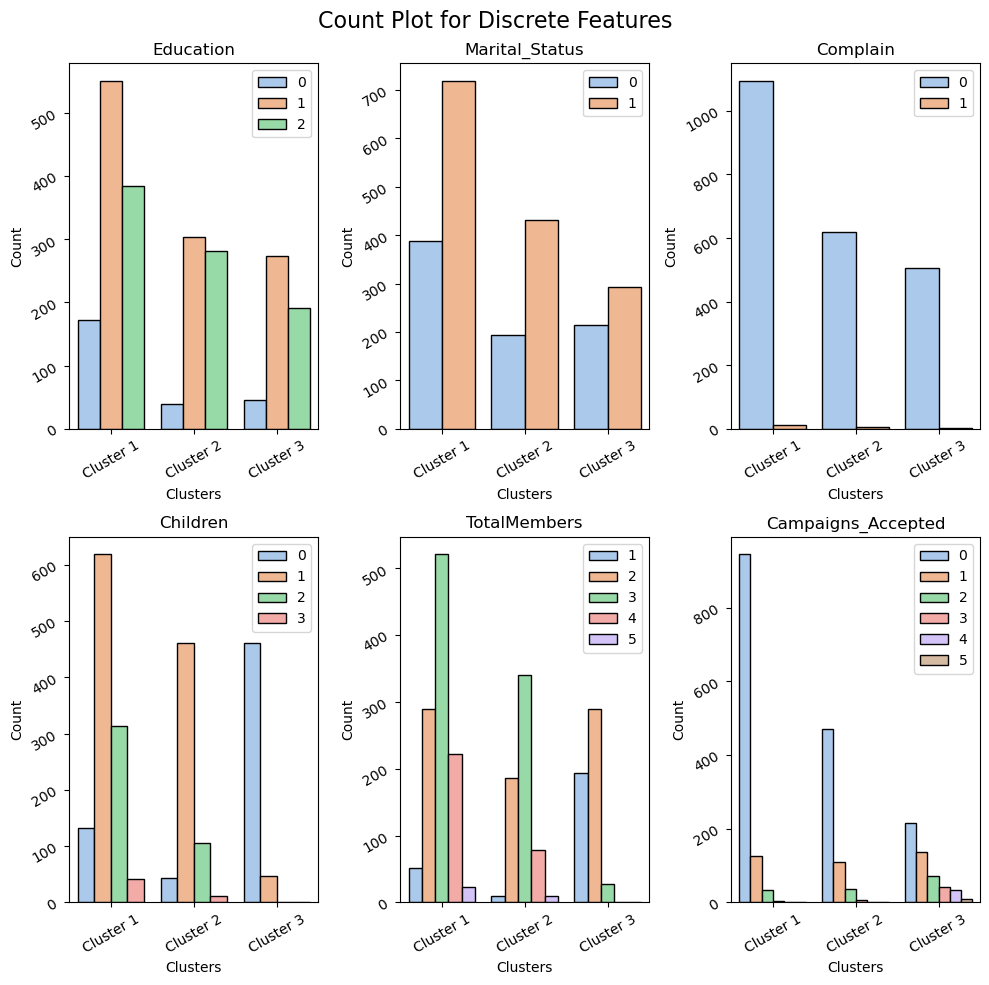

In [50]:
# Countplots for discrete features
grh_per_row = 3
fig, ax = plt.subplots(len(Discrete_feature) // grh_per_row, grh_per_row, figsize=(10, 10))

for count, feature in enumerate(Discrete_feature, 0):
    data_copy = df.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row
    pl = sns.countplot(x='Clusters', data=df, hue=feature, ax=ax[row, col],palette='pastel',edgecolor='black')  # Specify the axis for the countplot
    
    # Specify custom x-axis tick labels
    pl.set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])
    ax[row, col].set_title(feature)
    ax[row, col].set_xlabel("Clusters")
    ax[row, col].set_ylabel("Count") 
    ax[row, col].tick_params(axis='both', rotation=30)  # Rotate x-axis labels and adjust label size
    ax[row, col].legend()  # Set legend label size


plt.suptitle("Count Plot for Discrete Features", fontsize=16)
# Adjust layout
plt.tight_layout()
plt.show()

***Observations :***
1. Cluster 1 mostly have children, Cluster 2 just mostly have 1 child and Cluster 3 rarely have any child.
2. Cluster 1 has most of the family members and Cluster 3 has just 2 members.
3. Customers of Cluster 1 has rarely Accepted the Campagins and Customers of Cluster 3 has mostly accepted the campaigns.

# 5. Conclusion

***Methods Overview :***
1. **Scaling Method :** MinMax Scaling might not be suitable for this dataset as it creates two distinct groups far apart from each other, particularly due to the treatment of binary features.
2. **PCA Analysis :** The variance couldn't be explained by a few dimensions alone, indicating the need for a closer examination of how PCA builds each principal component to decide on relevant dimensions.
3. **Correlation Analysis :** Identified clusters of highly correlated features, such as income and spending behavior, marital status and family size, and customer activity and demographics.
4. **Cluster Selection :** Chose 3 clusters due to the uneven distribution of data points in 4 clusters, aiming for a more balanced distribution.
5. **Cluster Size:** Observed varying sizes of clusters, with Cluster 1 having the most customers followed by Clusters 2 and 3.

***Overall Observations / Insights :***
1. **Customer Distribution :** Cluster 1 comprises the majority of customers, with 1107 customers, followed by Cluster 2 with 624 customers, and Cluster 3 with 509 customers.
2. **Income and Spending Patterns :** Cluster 1 has the lowest income, while Cluster 2 has the highest income. Customers in Cluster 1 tend to spend less on wines and meat compared to customers in Clusters 2 and 3. Cluster 1 has the highest number of web visits per month, whereas Cluster 3 has the lowest.
3. **Customer Demographics :** Cluster 1 consists mostly of younger customers aged between 40-60, whereas Cluster 3 comprises older customers aged 60-80. Younger customers in Cluster 1 tend to spend less, while older customers in Cluster 3 spend more due to higher income levels.
4. **Family and Lifestyle :** Cluster 1 has mostly customers under 52 years of age, while Clusters 2 and 3 have customers primarily aged 50 and above. Clusters 1 and 2 have more customers with children, while Cluster 3 has fewer or no children. Cluster 1 has larger families compared to Cluster 3, which typically has two members.
5. **Purchase Behavior :** Customers in Cluster 1 tend to make fewer purchases compared to Clusters 2 and 3, where a higher percentage of customers make significant purchases. Cluster 1 mostly comprises new customers, while Cluster 2 has more long-time customers.
6. **Marketing Campaign Response :** Customers in Cluster 1 rarely accept marketing campaigns, while those in Cluster 3 are more likely to accept them.

***Final Conclusion for Each Cluster :***

1. ***Cluster 1 :***
- Largest cluster with younger customers (30-40 age group) and lower income levels.
- Spends less on wine, meat, and other products compared to other clusters.
- Mostly new customers, with a high number of web visits but lower total spending.

2. ***Cluster 2 :***
- Moderate-sized cluster with customers of mixed ages, but primarily older (50+ age group).
- Majority have children and larger family sizes, with higher incomes.
- Acceptance of campaigns varies but generally higher than Cluster 1, with moderate total spending.

3. ***Cluster 3 :***
- Smallest cluster comprising older customers (60-80 age group) with the highest income levels.
- Rarely have children and smaller family sizes, but higher acceptance of campaigns.
- Highest spending on wine, meat, and other products, with the highest total spending among all clusters.

These conclusions provide insights into the distinct characteristics and behaviors of customers within each cluster, aiding in targeted marketing strategies and personalized services.